Picutures are taken from here

https://github.com/Dyakonov/DL/blob/master/2022/DL_3NLP_02texts_202203a.pdf

https://github.com/Dyakonov/DL/blob/master/2022/DL_3NLP_04transformer_202204a.pdf

# seq2seq


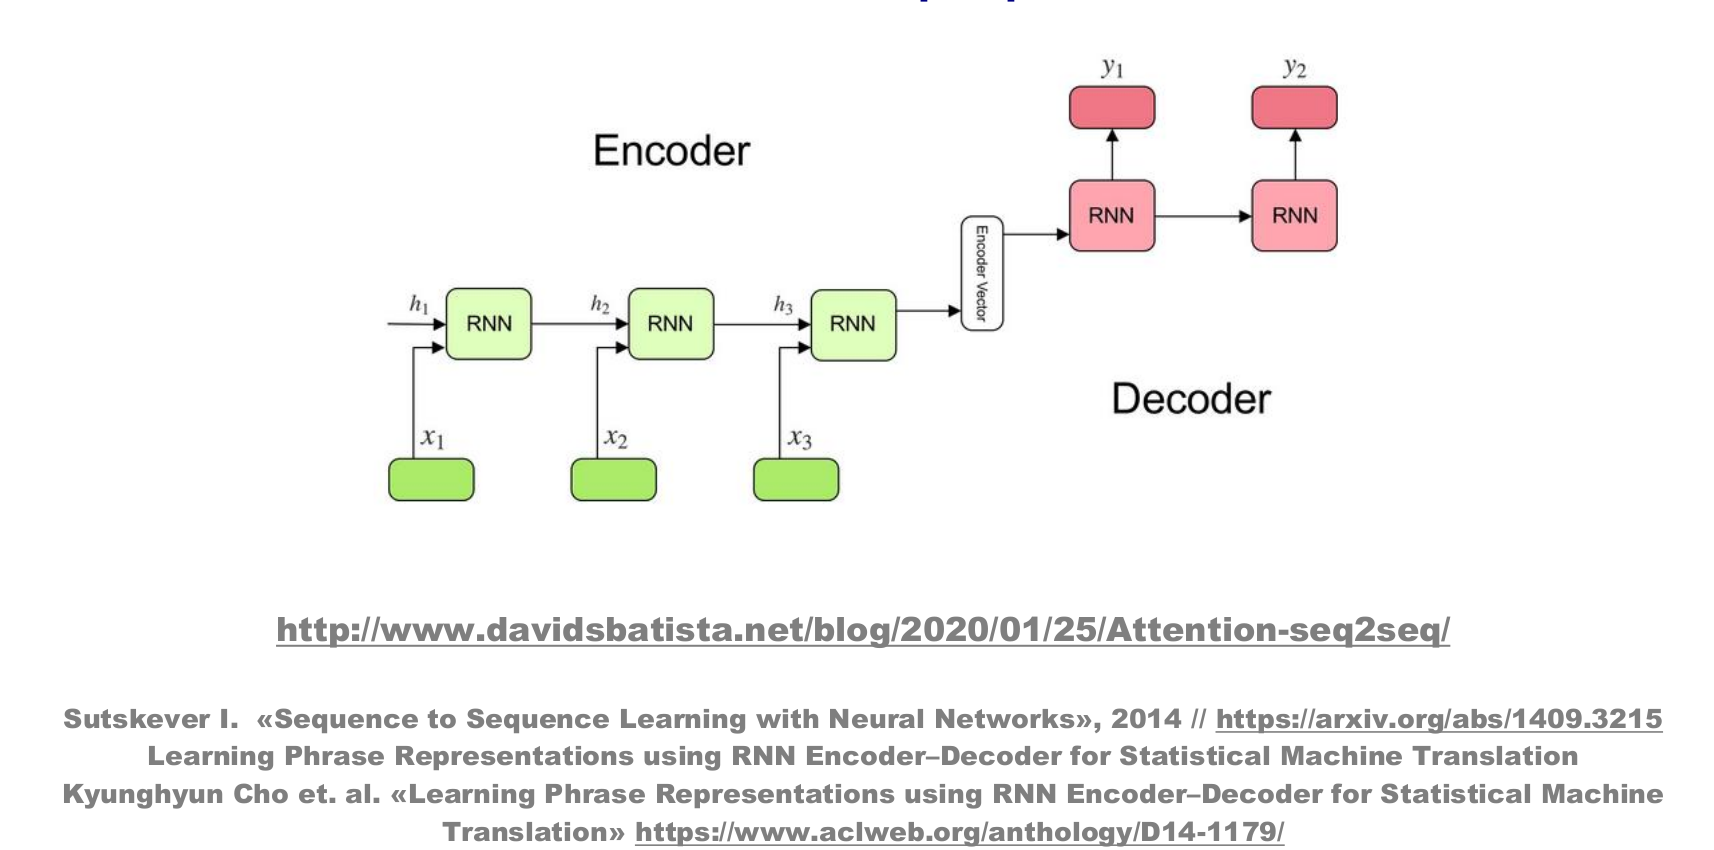

- mutlilayer LSTM
- encoder - decoder architechture
- encoder: input -> vector
- decoder: vector -> target
- both encoder and decoder are LSTM with different parameters
- inverting of input order increases translation quality
- ensembles are good too

### Inner representation of sentences (for seq2seq)

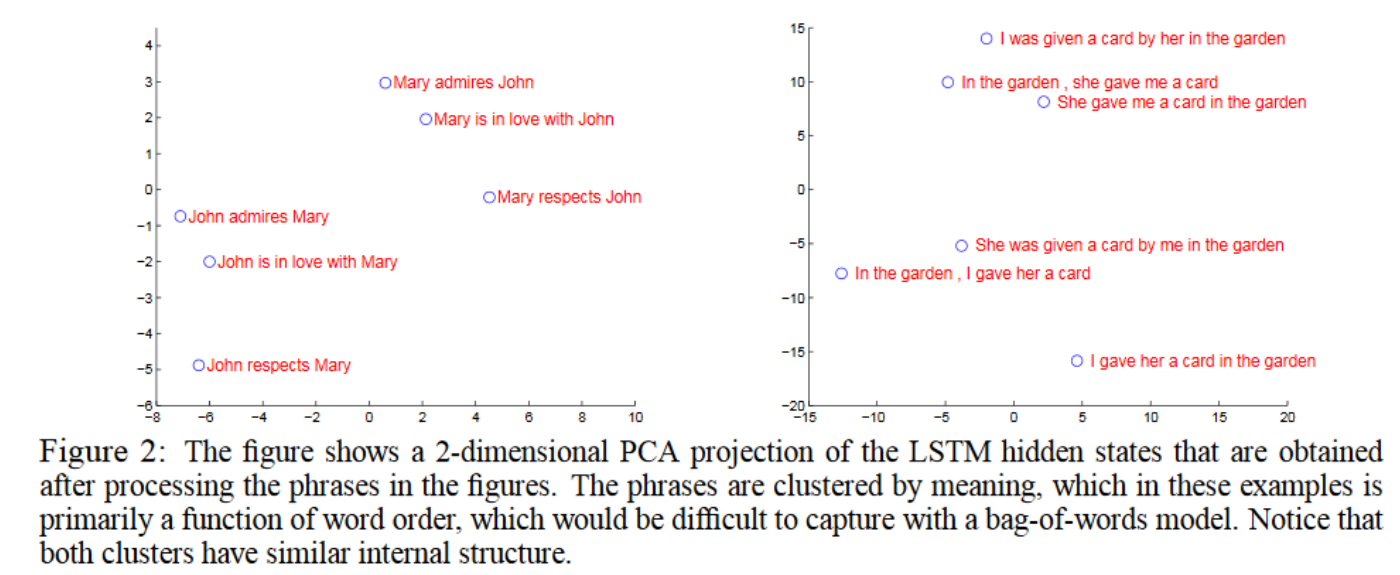

# Attention

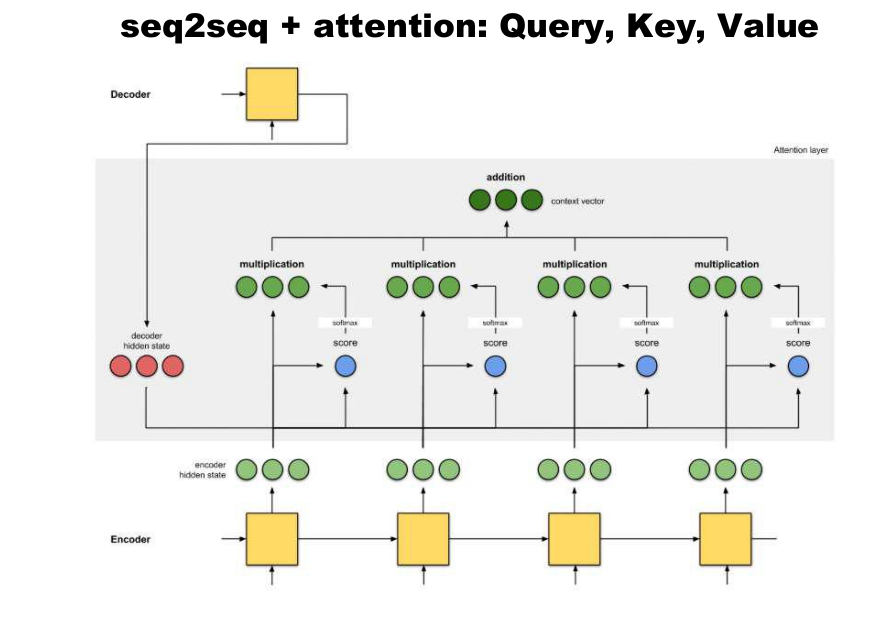

Mechanism that lets decoder to "look" at previous/next encoder states to make more precise decision

### Key-Query-Value paradigm

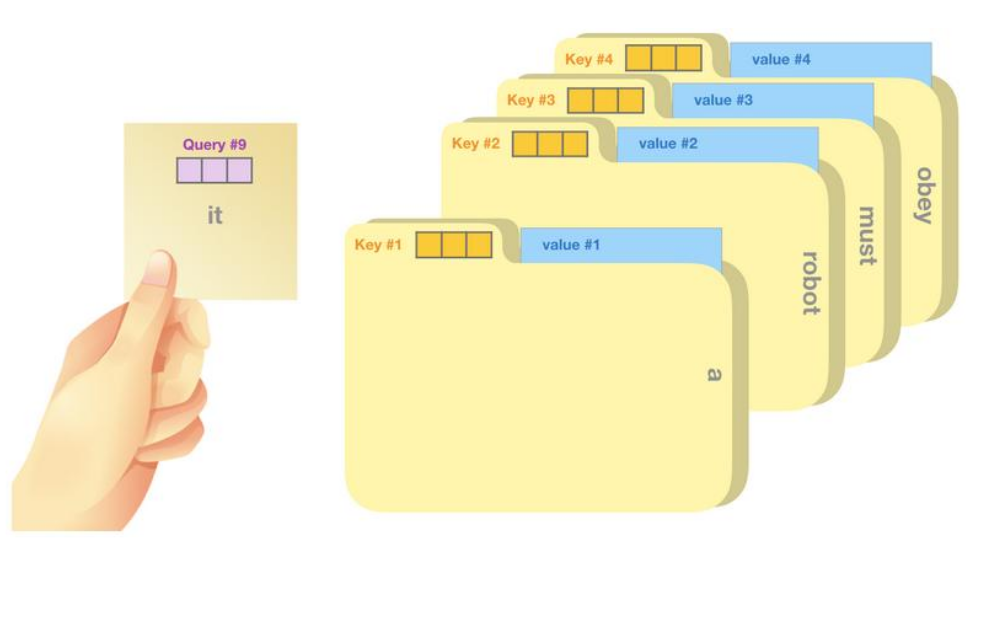

### Attention mechanism

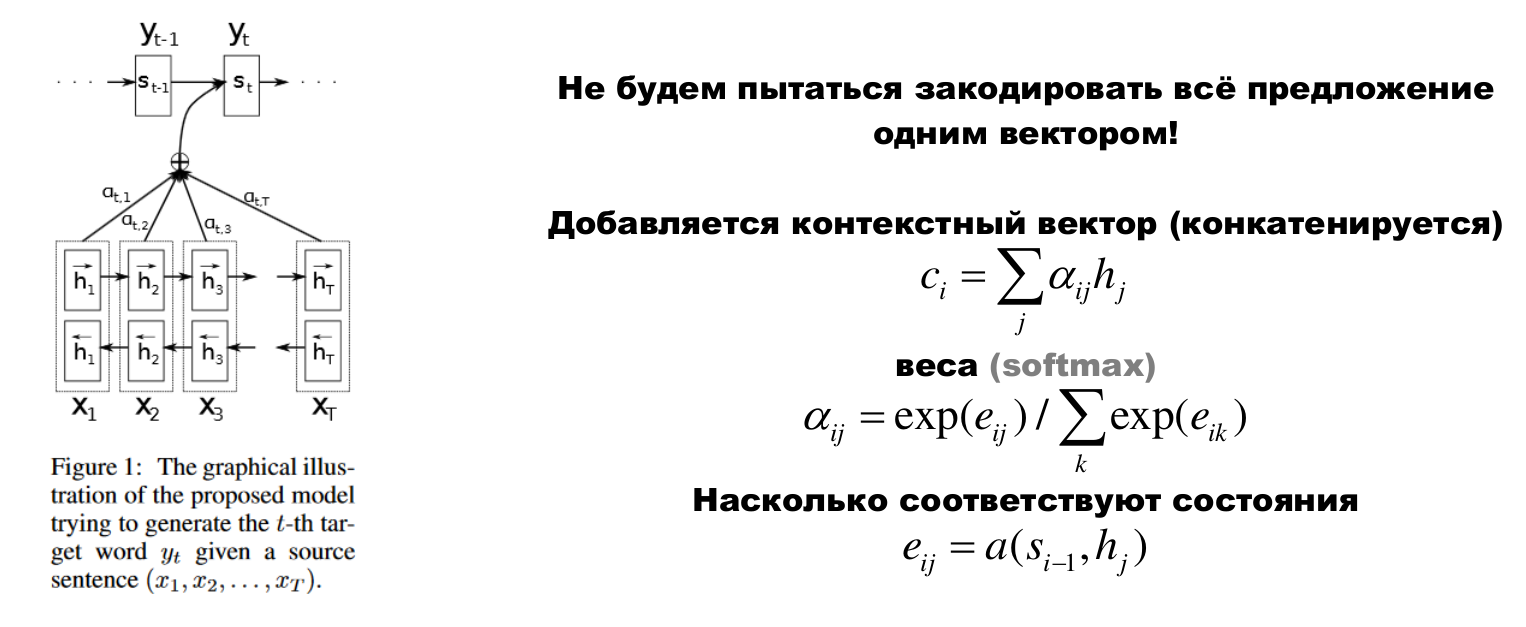



x<sub>1</sub>, x<sub>2</sub>, ..., x<sub>t</sub> - input sentense tokens 

h<sub>1</sub>, h<sub>2</sub>, ..., h<sub>t</sub> - encoder hidden states (**key**)

y<sub>1</sub>, y<sub>2</sub>, ..., x<sub>t</sub> - output sentense

s<sub>1</sub>, s<sub>2</sub>, ..., s<sub>t</sub> - decoder hidden states (**query**)



e<sub>i</sub> = a(h<sub>i</sub>, s<sub>t</sub>) - measure of similarity between h<sub>i</sub> and s<sub>t</sub>

$\alpha$<sub>i</sub> - softmax of e<sub>i</sub>

c<sub>t</sub> - context vector (concatenate all h with corresponding $\alpha$) (**value**)

y<sub>t</sub> = o(s<sub>t</sub> + c<sub>t</sub>); o - decoder output layer, "+" - concatenation

### How to measure similarity between h<sub>i</sub> and s<sub>i</sub>

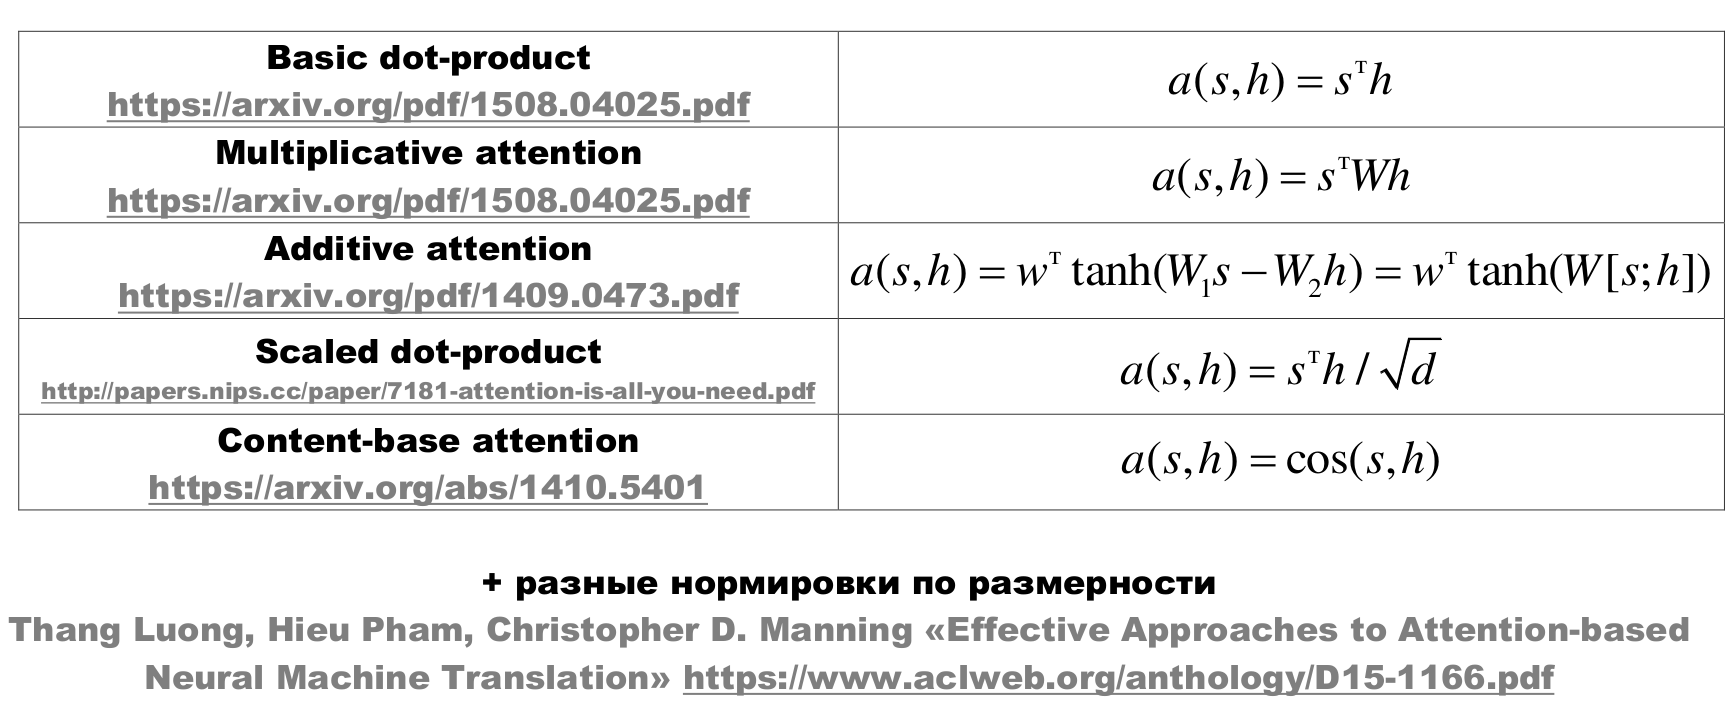

d - dimensiality of vector

### Attention mechanism one more scheme

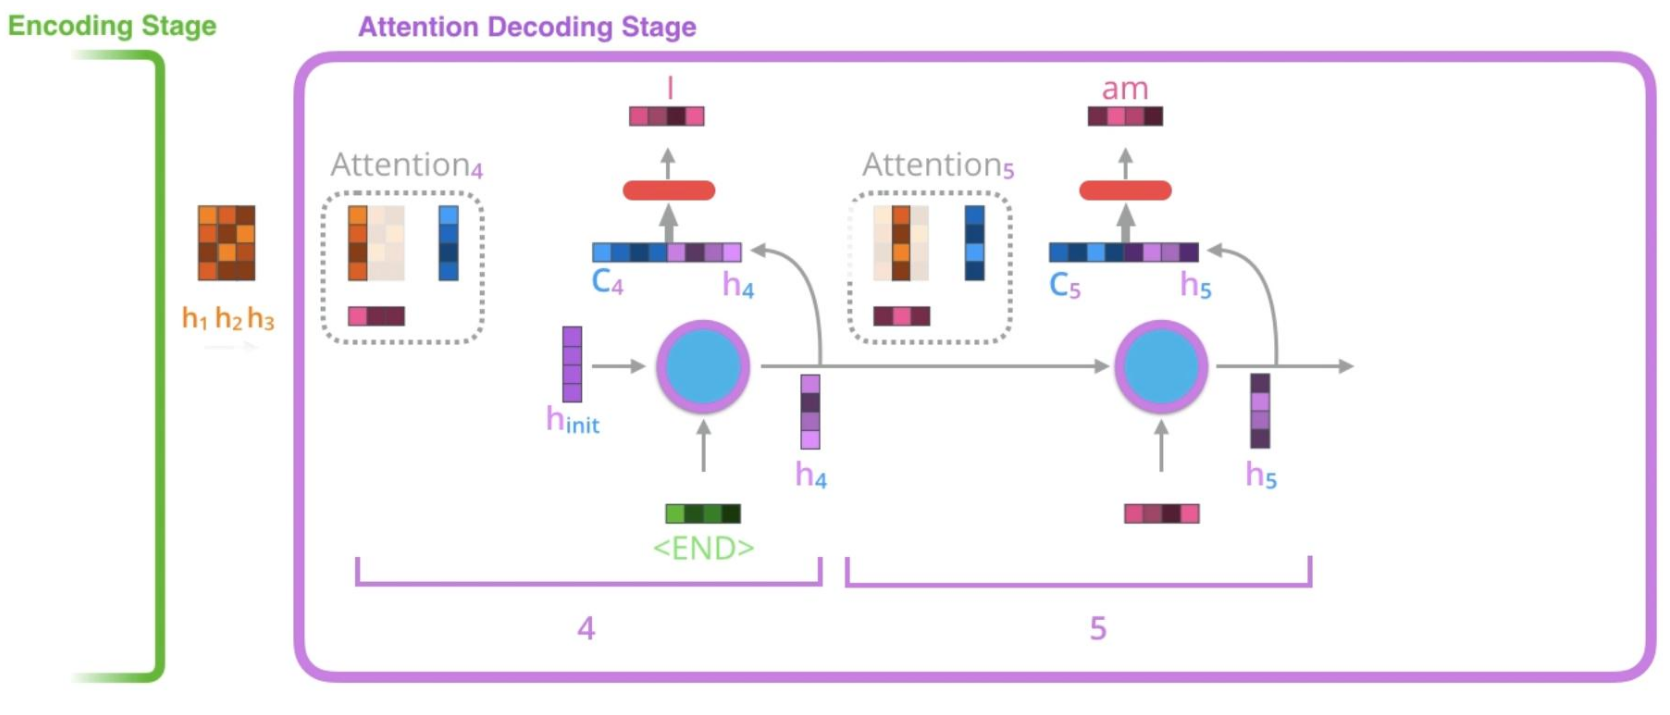

### Self-attention

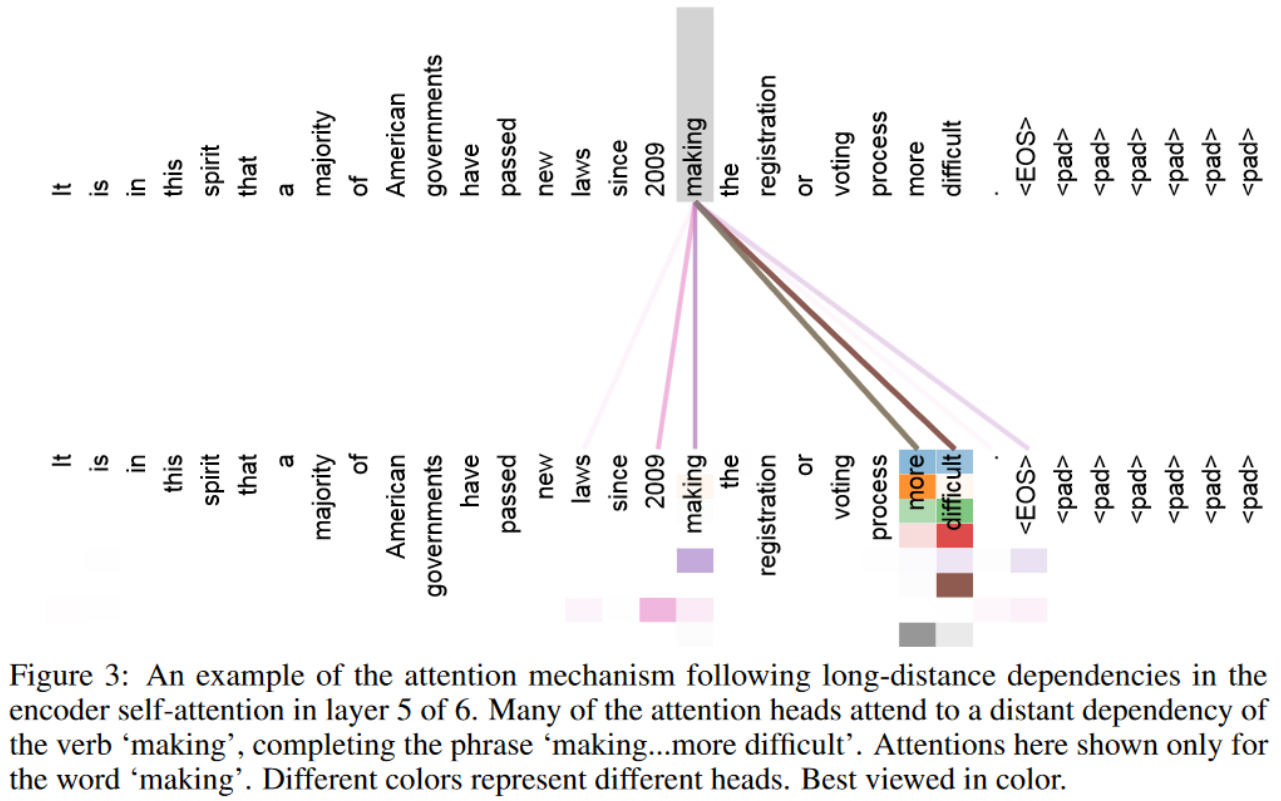

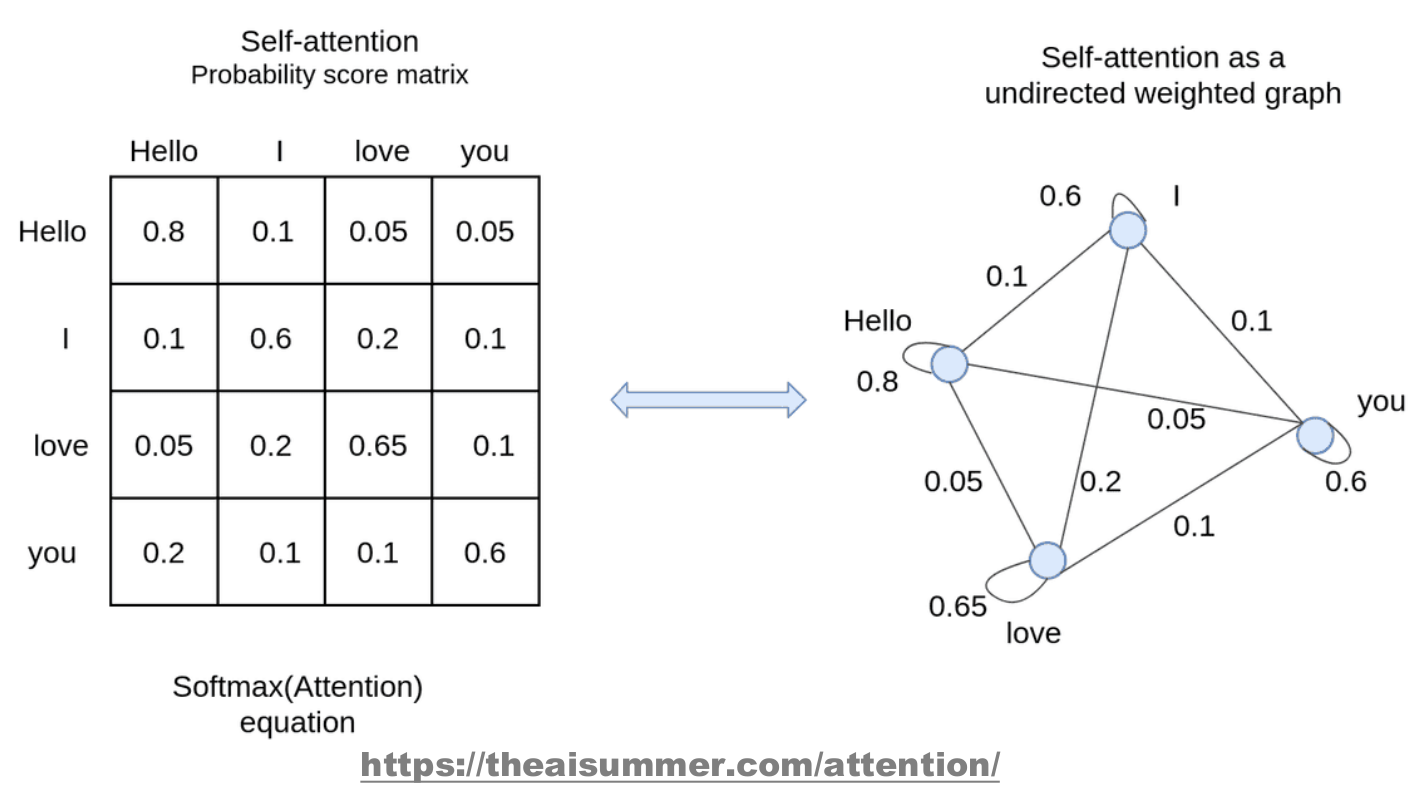

### Attention formula

Matrix V<sub>d x s</sub> contains keys

Matrix K<sub>d x s</sub> contains keys

q - query vector

d - dimensiality

s - number of objects

Dimensialities d of matrices K and V can be different

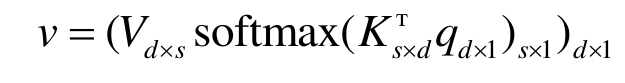

We take our query vector and multiply transposed key matrix K on it, i.e. we measure similarity between query vector and every key in key matrix. Then we use softmax to find the key vector that is the most similar to our query. Then we multiply most similar key vector and value matrix V to get our value. 

### Multi-Head Self-Attention

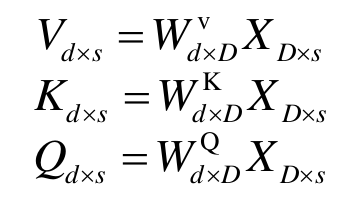

Two more matrices are added:

Matrix X<sub>D x s</sub> contains objects for attention

Matrix Q<sub>d x s</sub> contains keys

Self-atteniton formula (similar to previous). alpha = 1/sqrt(d), it's used for calculation stability.

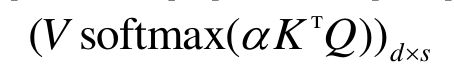

I.e. we have send s queries (with dimensiality D) to self-attention and as result get s values (with dimensiality d). Structure that performs these operations is called head.

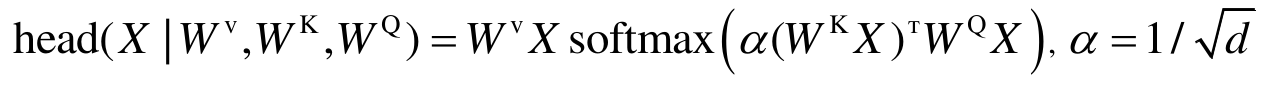

Transformer has multiple heads (e.g. 8). One head differs from another by a set of matrices W<sup>V</sup>, W<sup>K</sup>, W<sup>Q</sup>

Than results from all head are concatenated and multiplied with matrix W<sub>D x 8d</sub> 

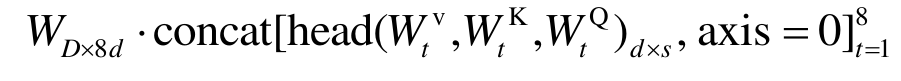

As a result we get attention matrix A<sub>D x s</sub> that has the same dimensiality as object matrix X<sub>D x s</sub>

### Attention alignment

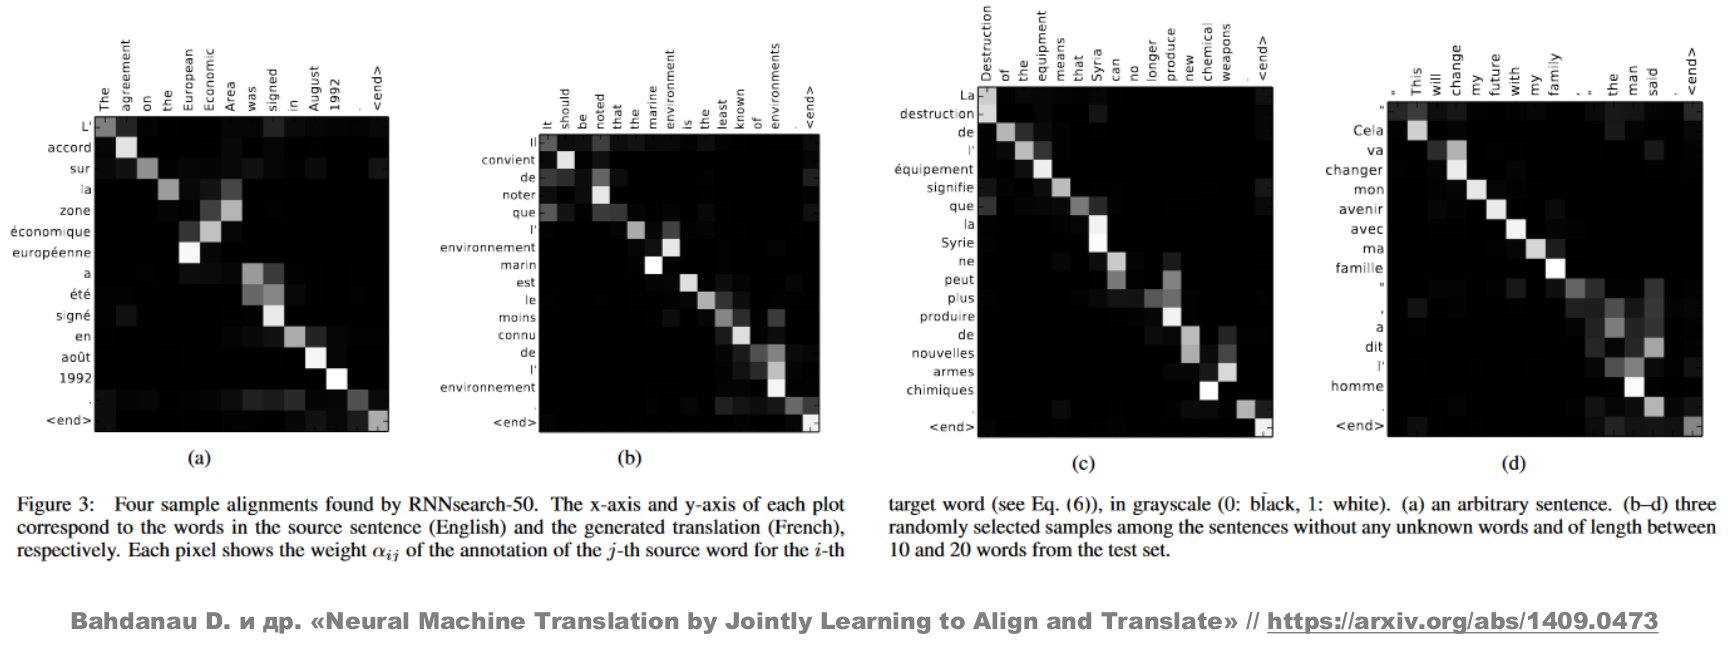

### Attention helps to solve narrow gap problem (quality deterioration for long sentences)

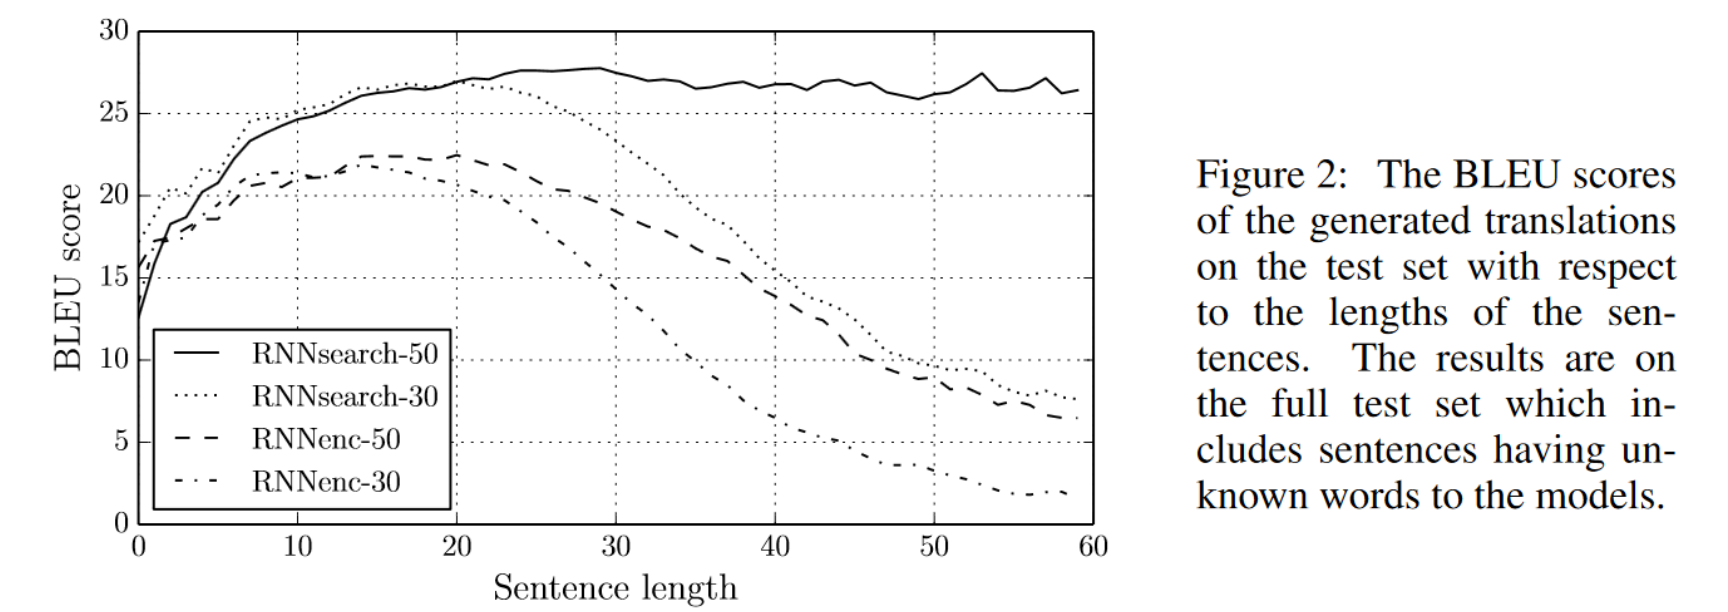

### seq2seq vs attention

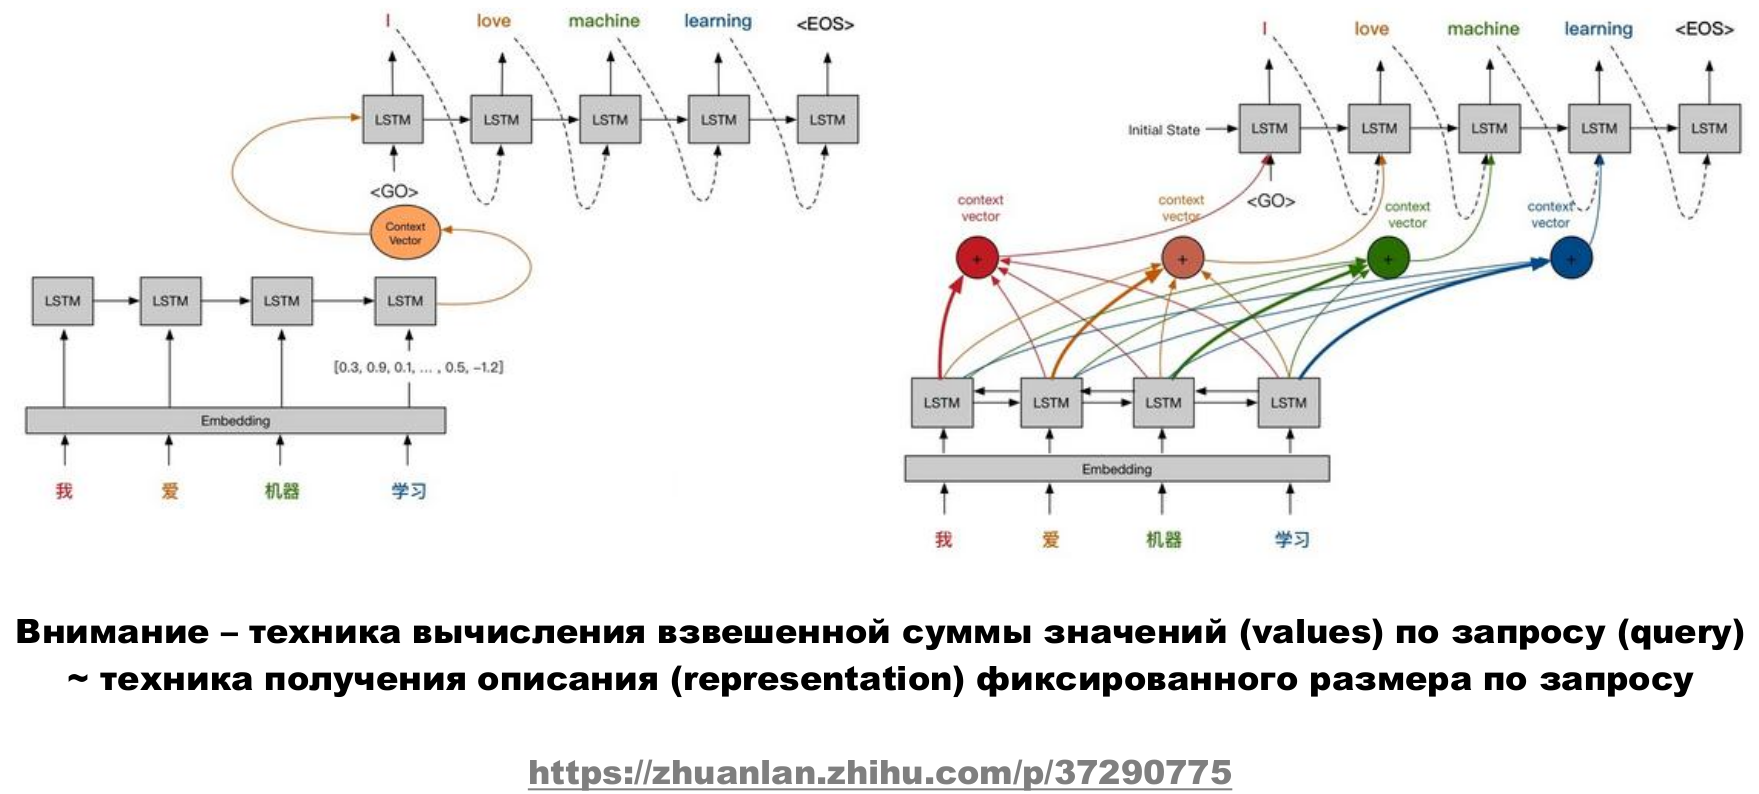

### Attention advantages

- increase translation quality
- solves narrow gap problem
- interpetable
- solves problem of vanishing gradients
- "free" alignment (correct word order) in translation (see attention alignment above)

### Attention types

- self-attention / intra-attention (attention to the different positions of the same input sequence)
- global / soft (attention to the whole output)
- local / hard (attention to the part of the output)

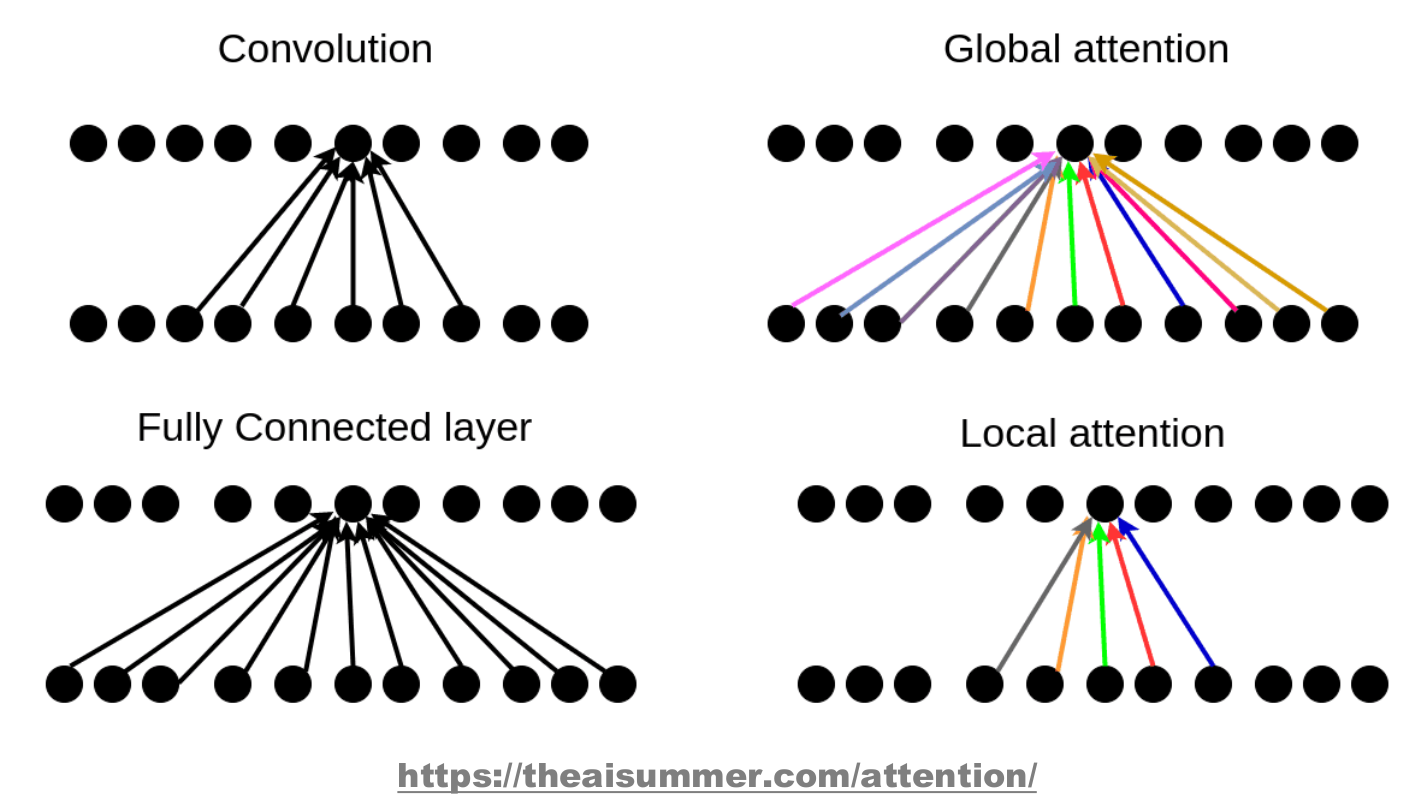

### Local attention vs global attention

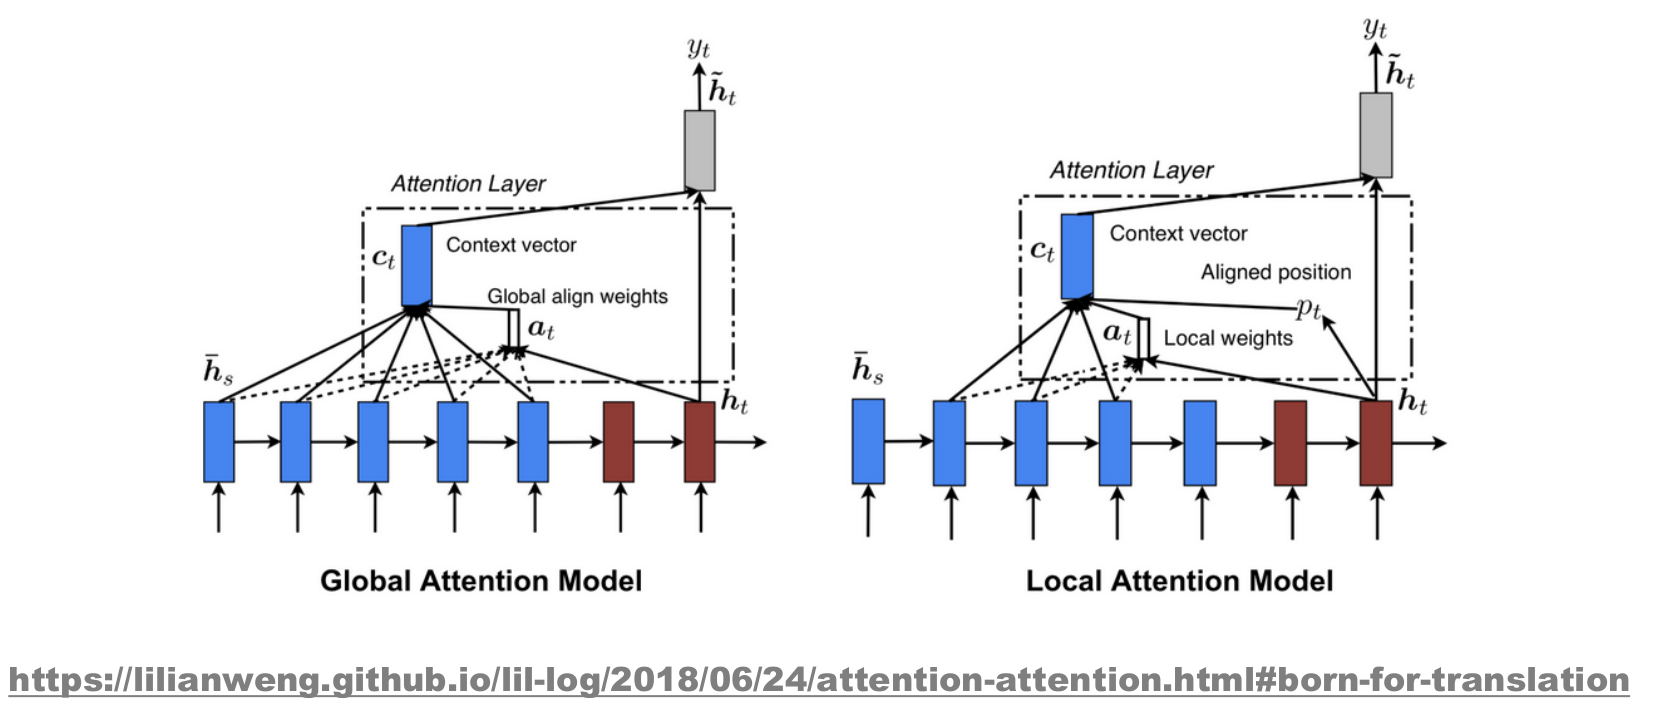

### Conclusion

- RNN - natural architecture for short sequences, no parallelization
- 1D-conv - bad for long sequences + parallelization
- self-attention - good for long sequences + parallelization but consumes a lot of memory

### More about attention here

https://lilianweng.github.io/lil-log/2018/06/24/attention-attention.html


# Transformers

Main idea: parallelized attention

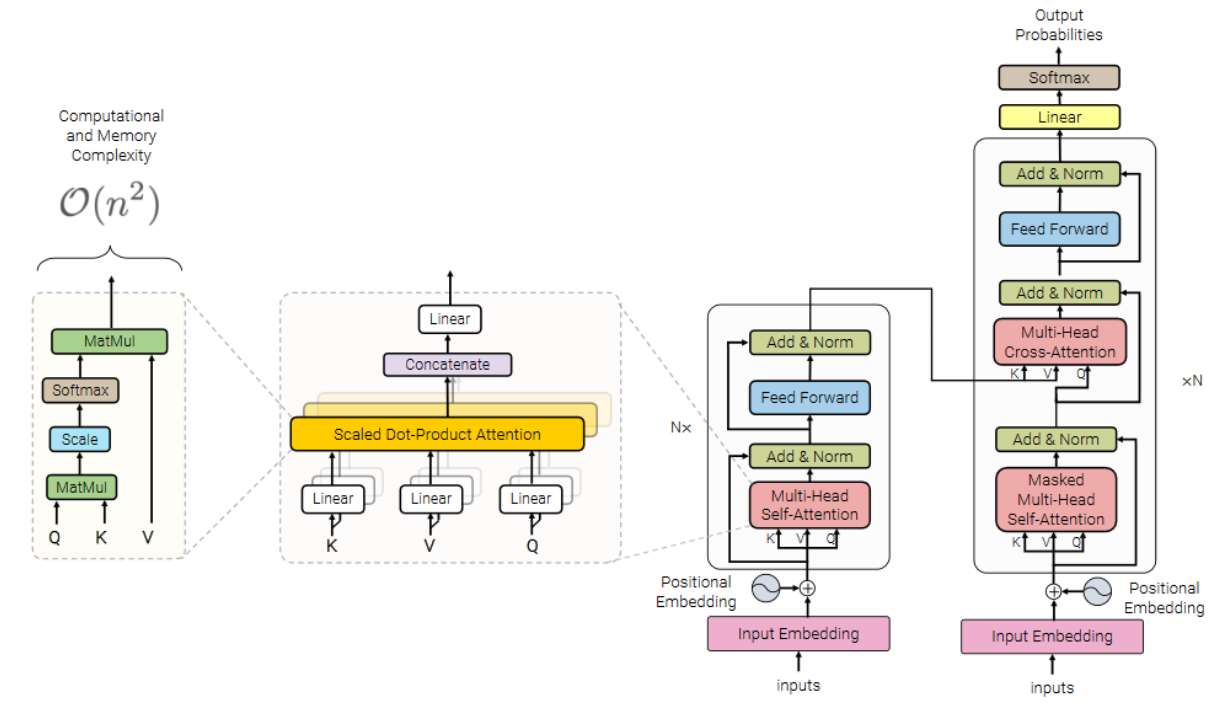

Left part is encoder, right part - decoder.



### Transformers: main

- transformer is a stacking of transformer blocks (see Self-Attention Block scheme on image above)
- diffrent heads is used for different attentions: e.g. 1st head is used to analyze words adjucent to current word (close context), 2nd is used to look for words that are connected with current word through syntax/semantics, 3rd is used to look for synonims of current word in sentence, etc.
- every next transformer layer returns more and more complex and general token embeddings (like in convolutional networks): on the first layers NN sees connections between words, on the last - "understands" meaning of words and sentences
- tokens on the output of attention block don't change their dimensions
- transformer is non-recurrent model for sequences (if we look at attention block matrices - we will see that their dimensions don't depend on number of objects *s* in sequence, so transformer block can process sequence of any length)
- transformer is a deep model with attention blocks
- last layer is softmax + cross-entropy error

### Transformer: main structure

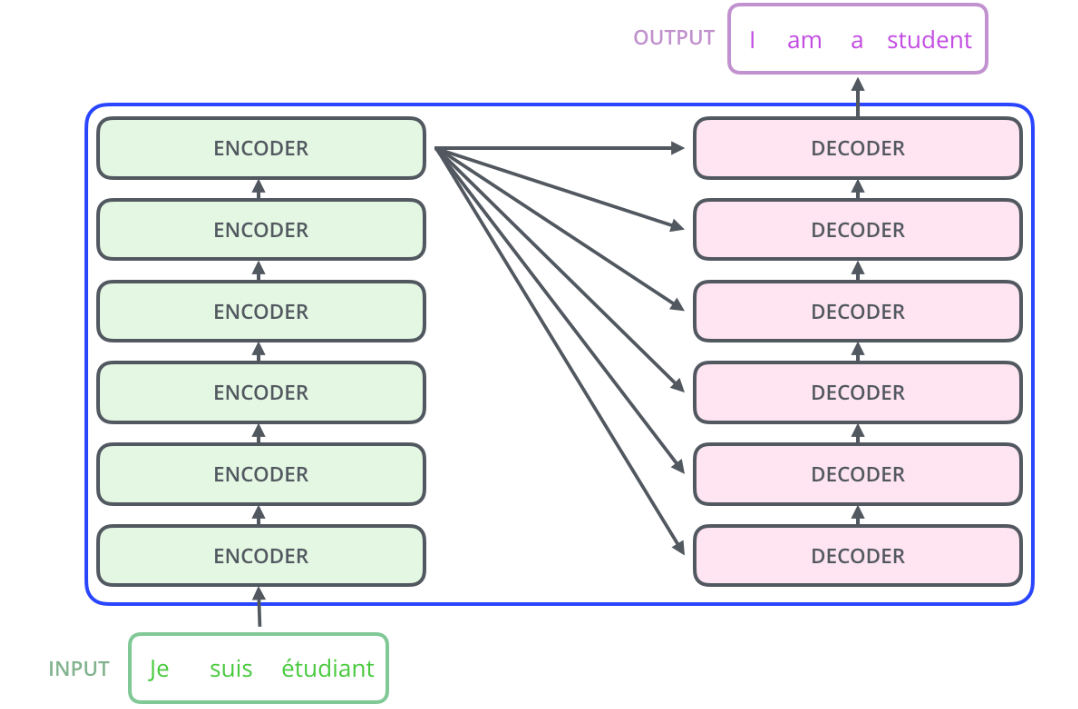

### Endcoder-Decoder structure

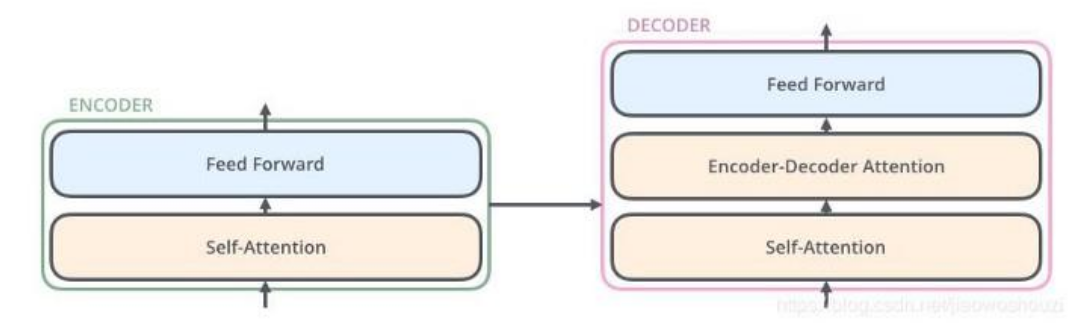

Encoder 
- 1st layer, self-attention: analyze context semantics by looking at whole sentence
- 2nd layer, feed-forward: non-linear feature space transformation

Decoder 
- 1st layer, self-attention: analyze context semantics by looking at whole sentence
- 2nd layer, self-attention: analyze context semantics by looking at whole sentence in encoder
- 3rd layer, feed-forward: non-linear feature space transformation

### Attention in transformers

Types of attention in transformers

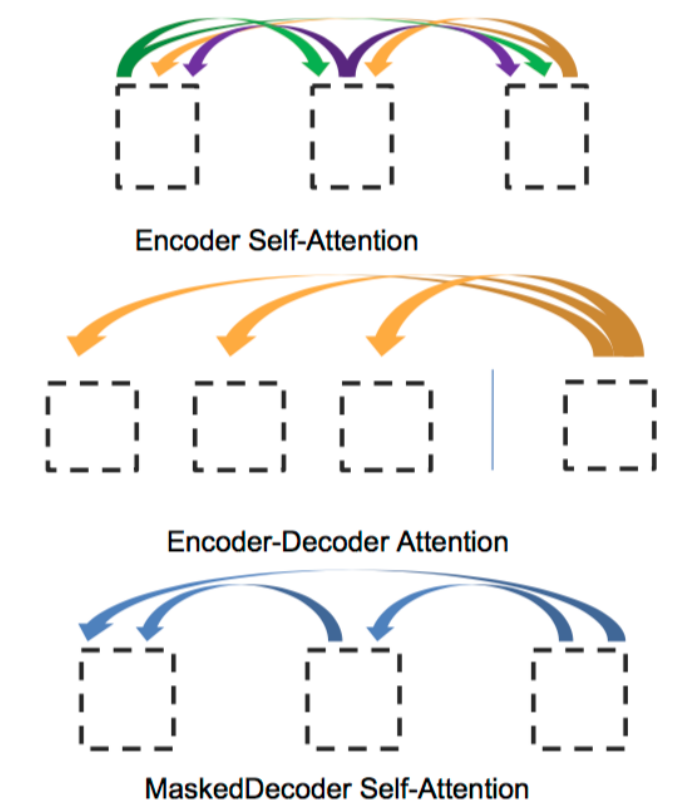

1st attention type is used in encoder, 2nd and 3rd types - in decoder

### Matrices for self-attention

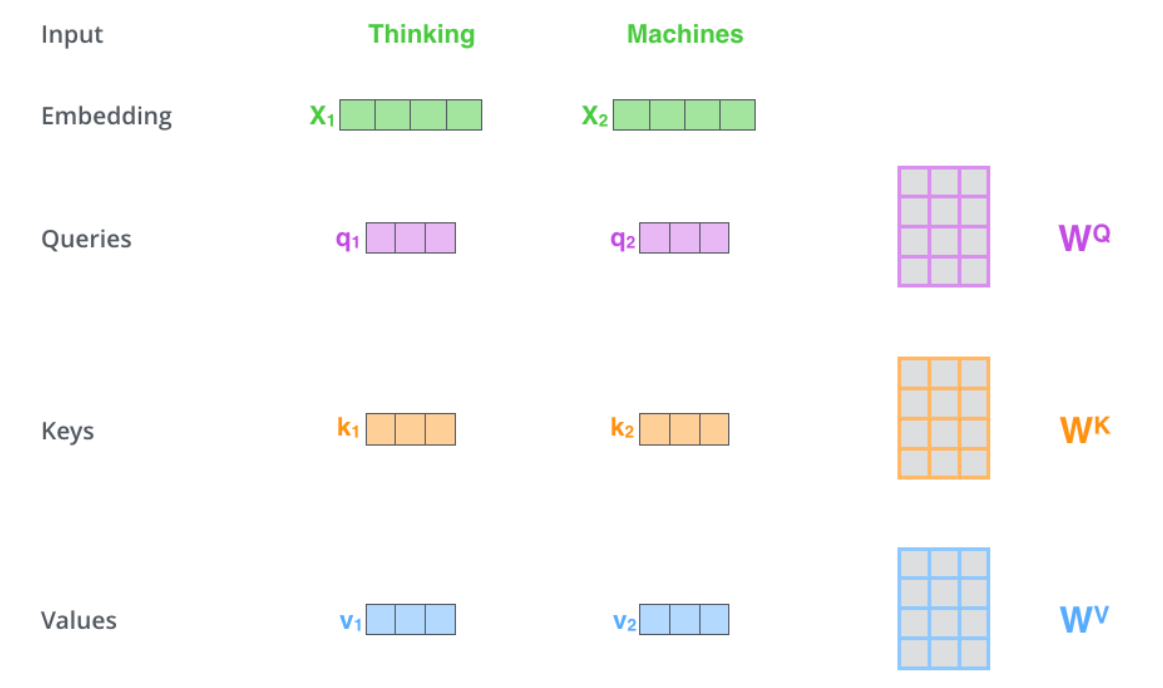

- X<sub>i</sub> dimensiality is 512
- q<sub>i</sub>, k<sub>i</sub>, v<sub>i</sub> dimensialities are 64
- q<sub>i</sub>, k<sub>i</sub> and v<sub>i</sub> are obtained by multiplying input vector X<sub>i</sub> on corresponding matrix



### Self-Attention process

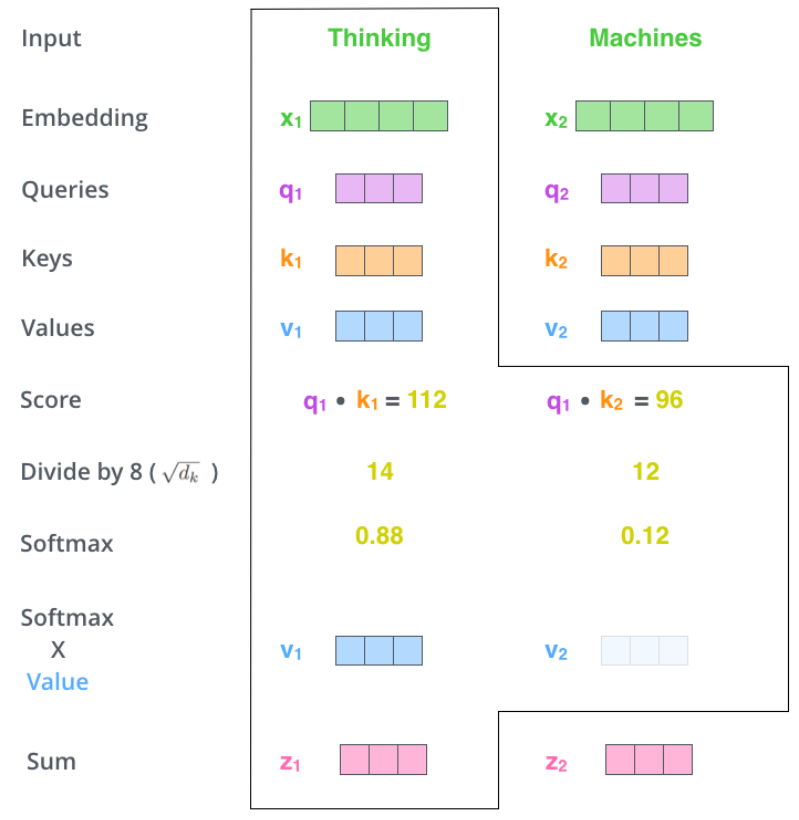

### Self-Atention process: matrix view

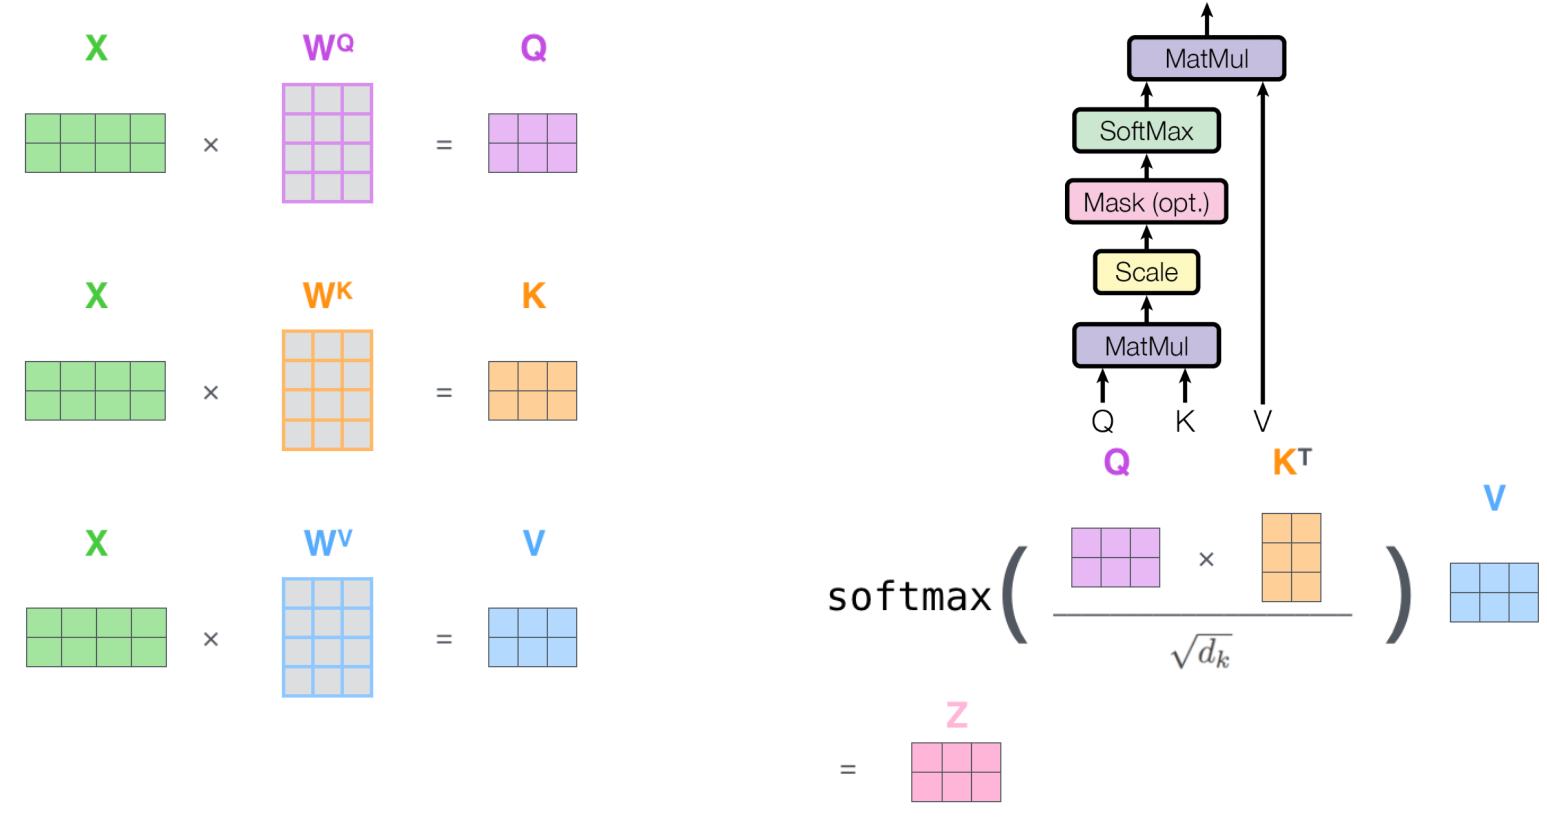

### Mutli-Headed attention: matrix view

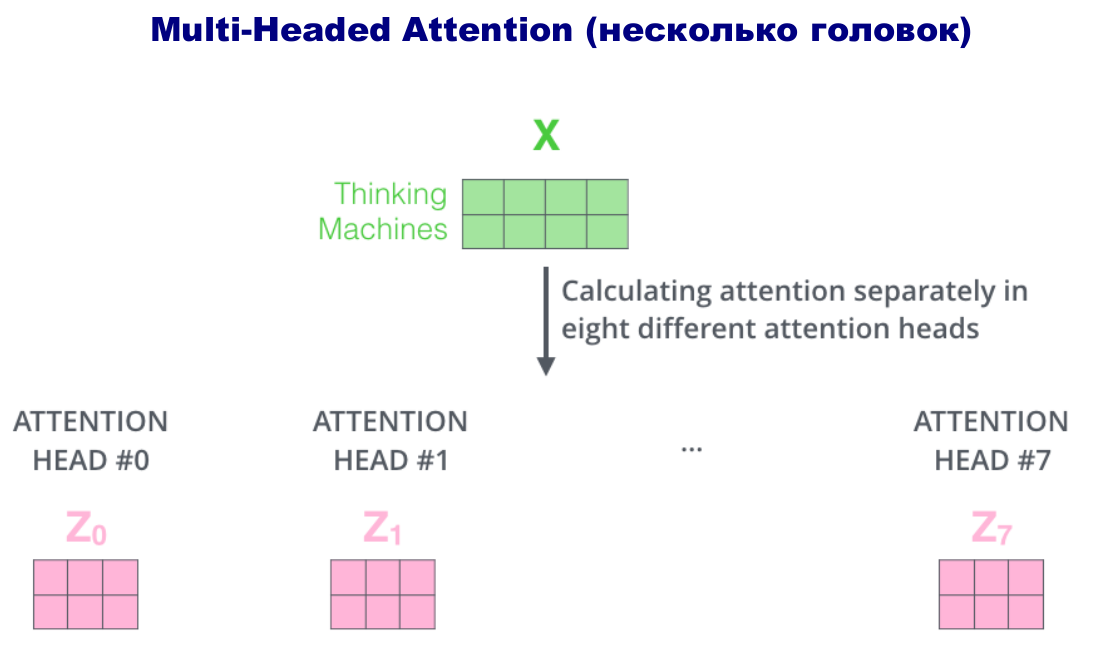

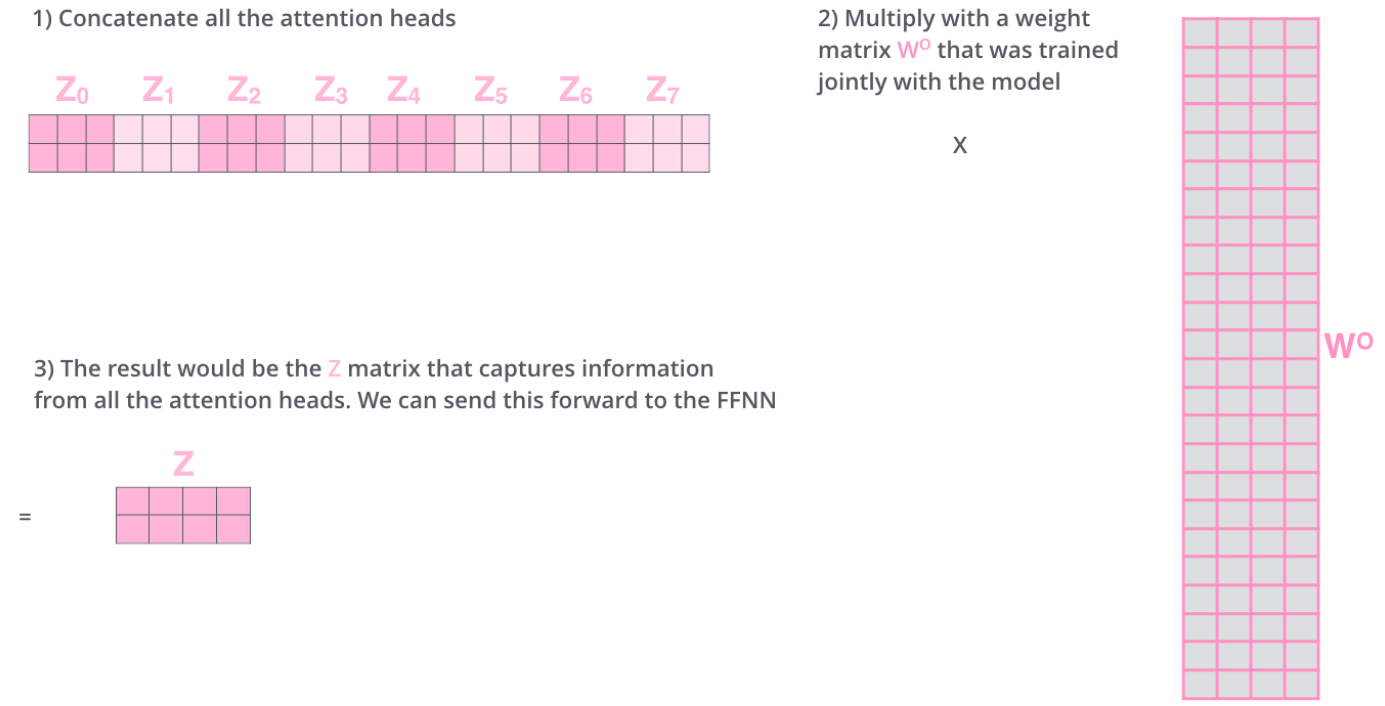

### Multi-Headed Attention: the whole process

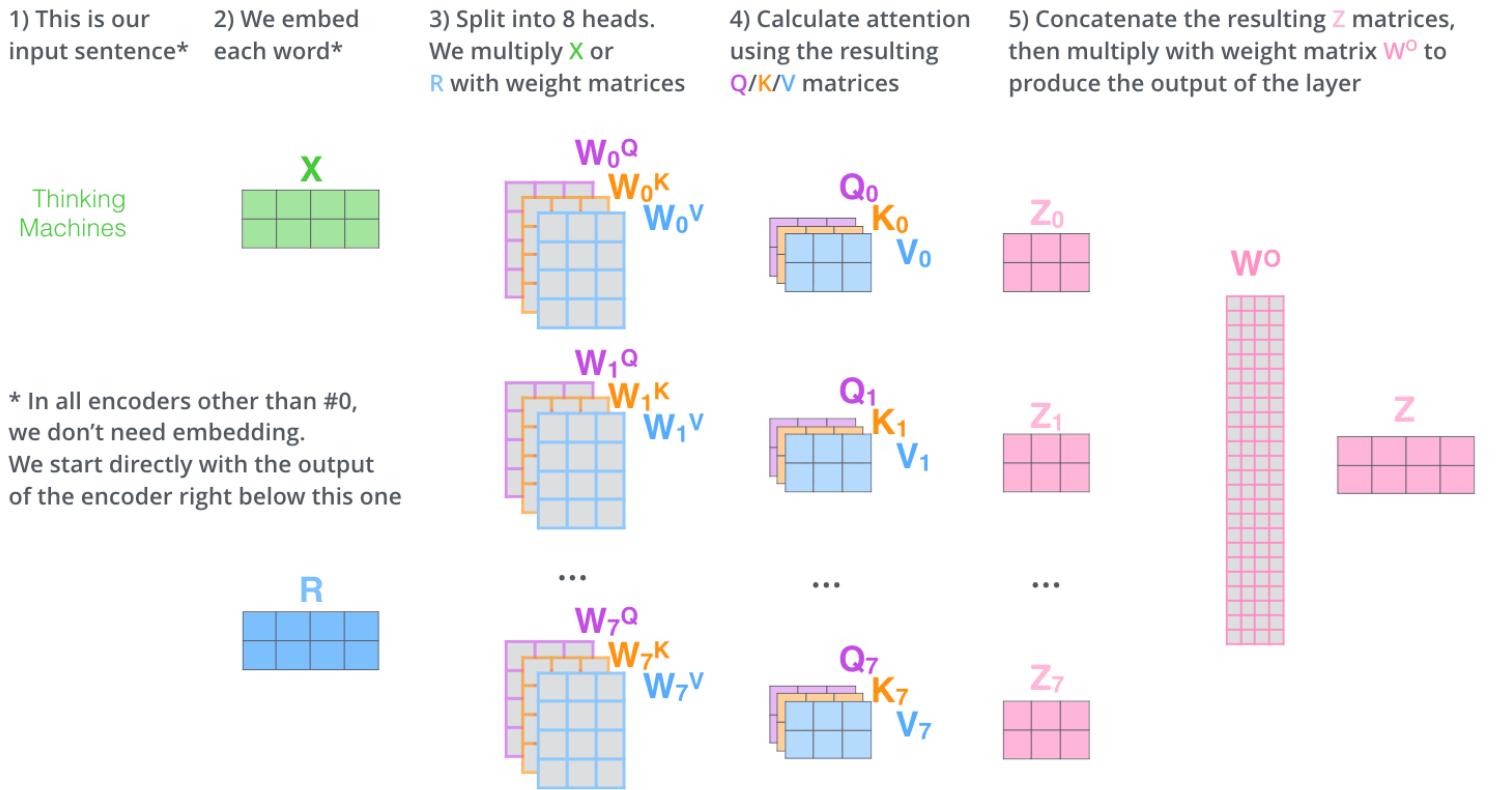

## Encoder

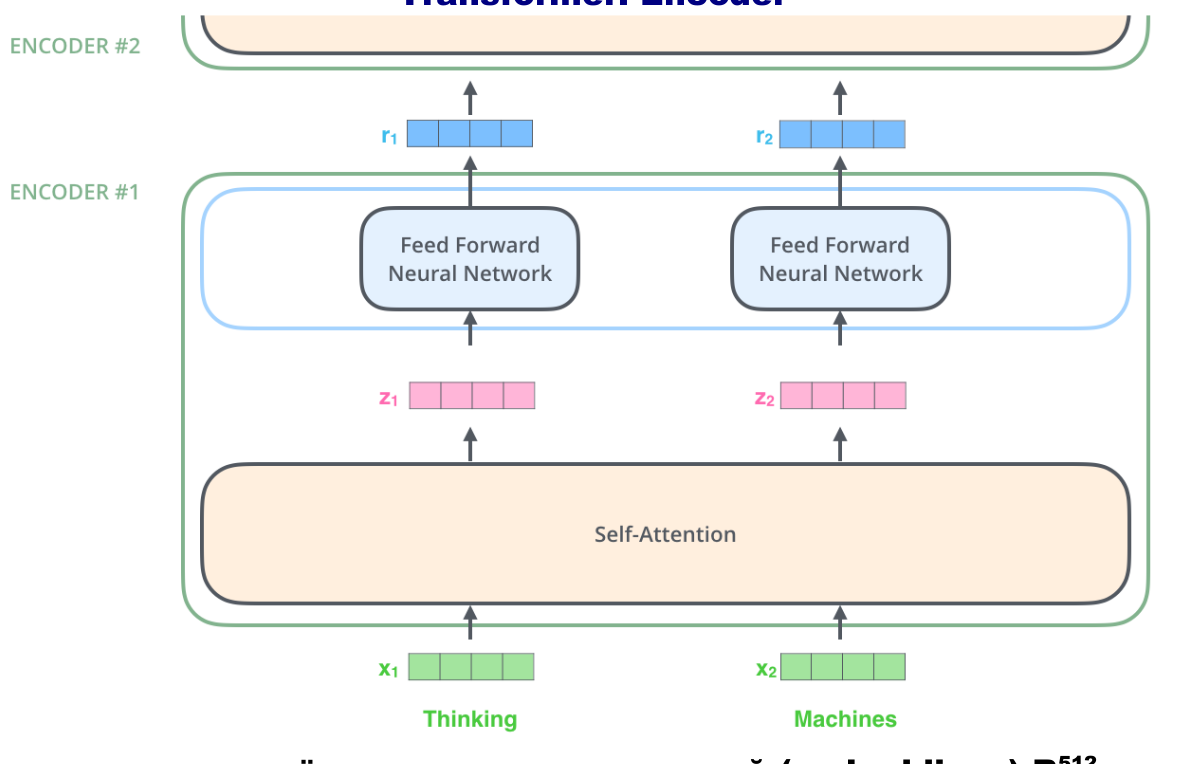

- input dimensiality is 512, output dimensiality is 512 too
- feed-forward NN is the same for any token

### Position Encoding/Embedding

Problem: unlike RNN, transformer doesn't know the order of words in sentence, so we need to encode word positions before sending them to transformer.

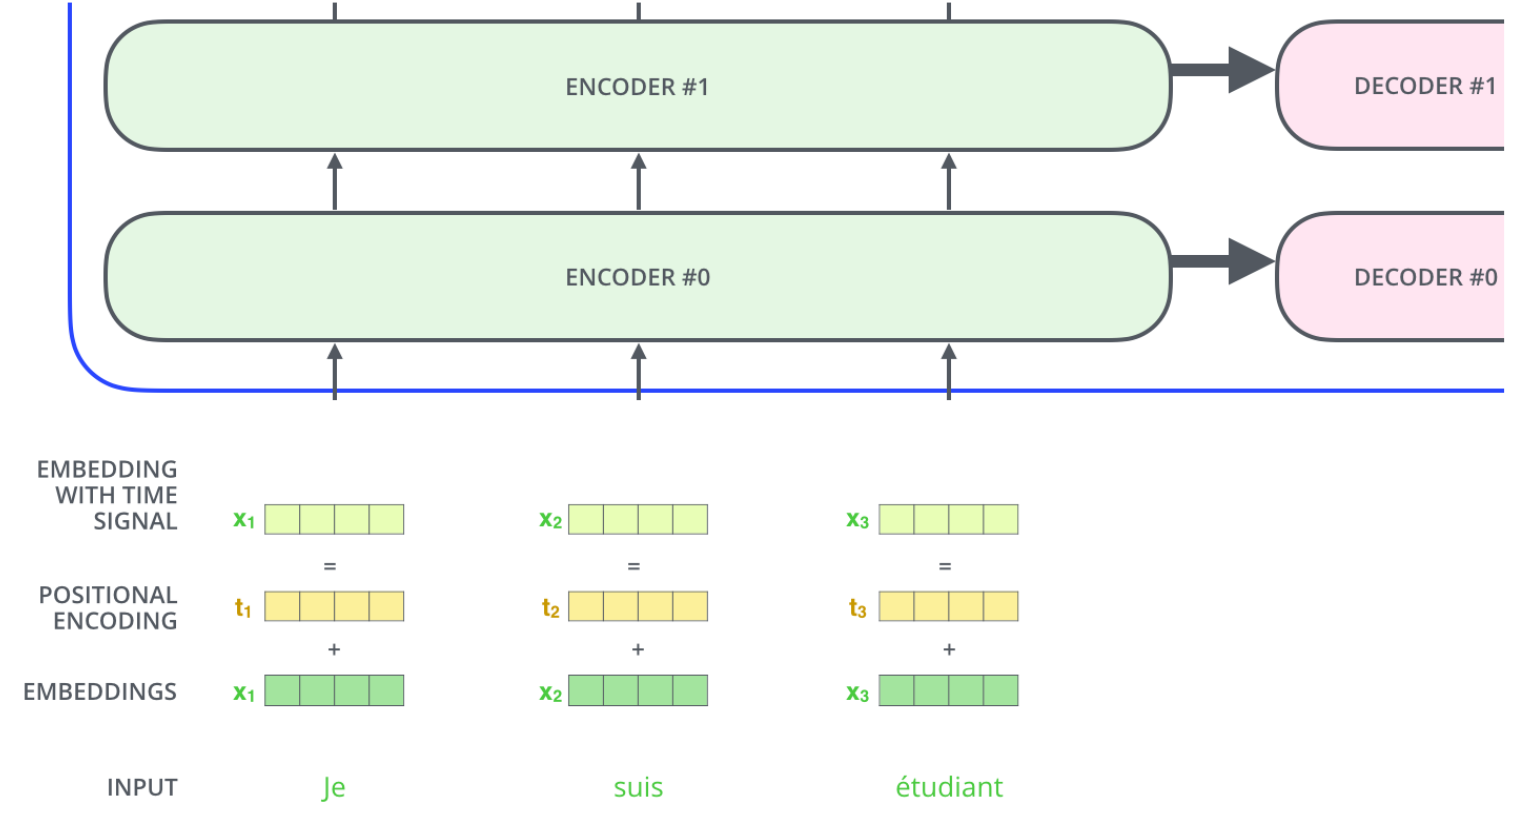

### Position Encoding mechanism

But we also need that encoding method doesn't depend on length of sentense. So for number of position *t* we make 
d-dimensional vector with values:

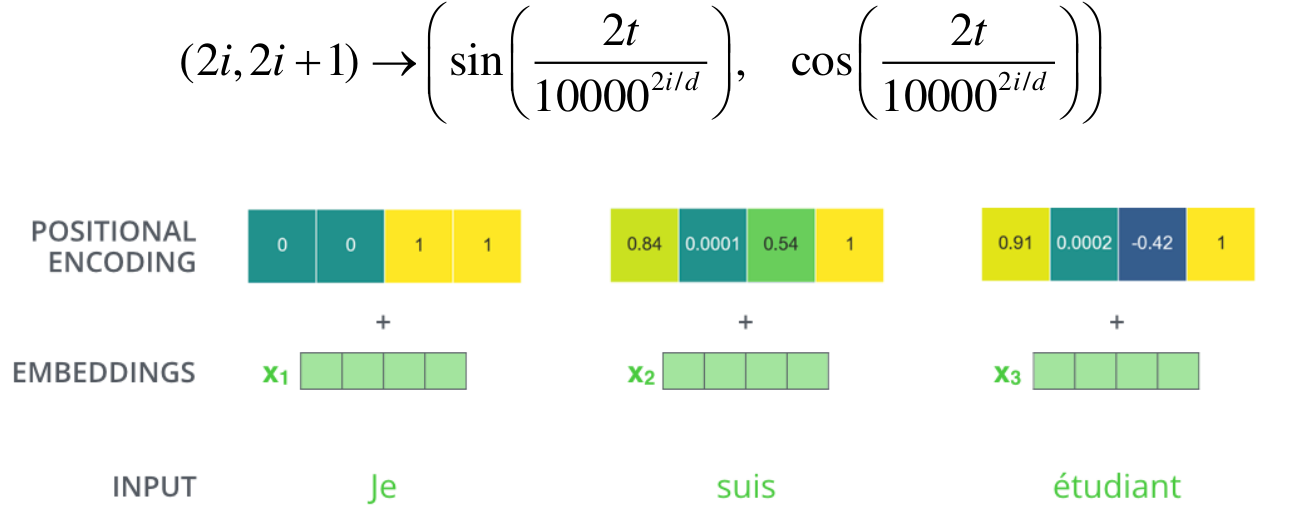

This image is made for d = 4

### Position Encoding visualization (128-dimensional encoding of 50 positions)

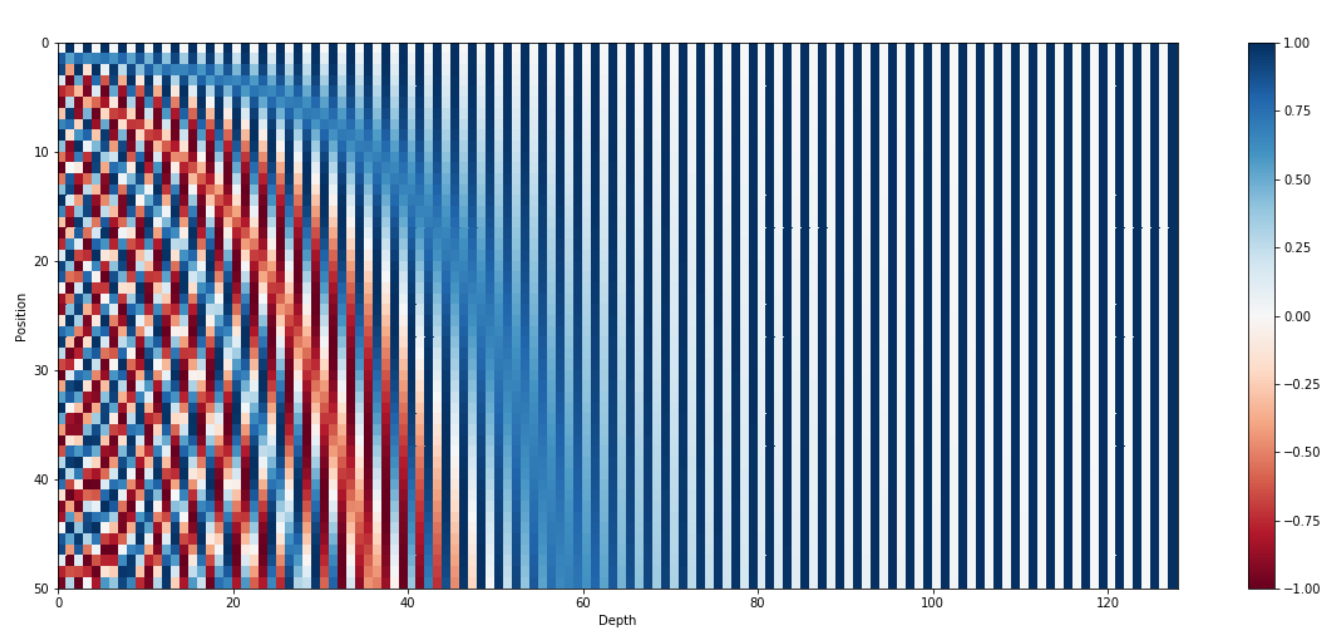

### Residual connection and layer normalization

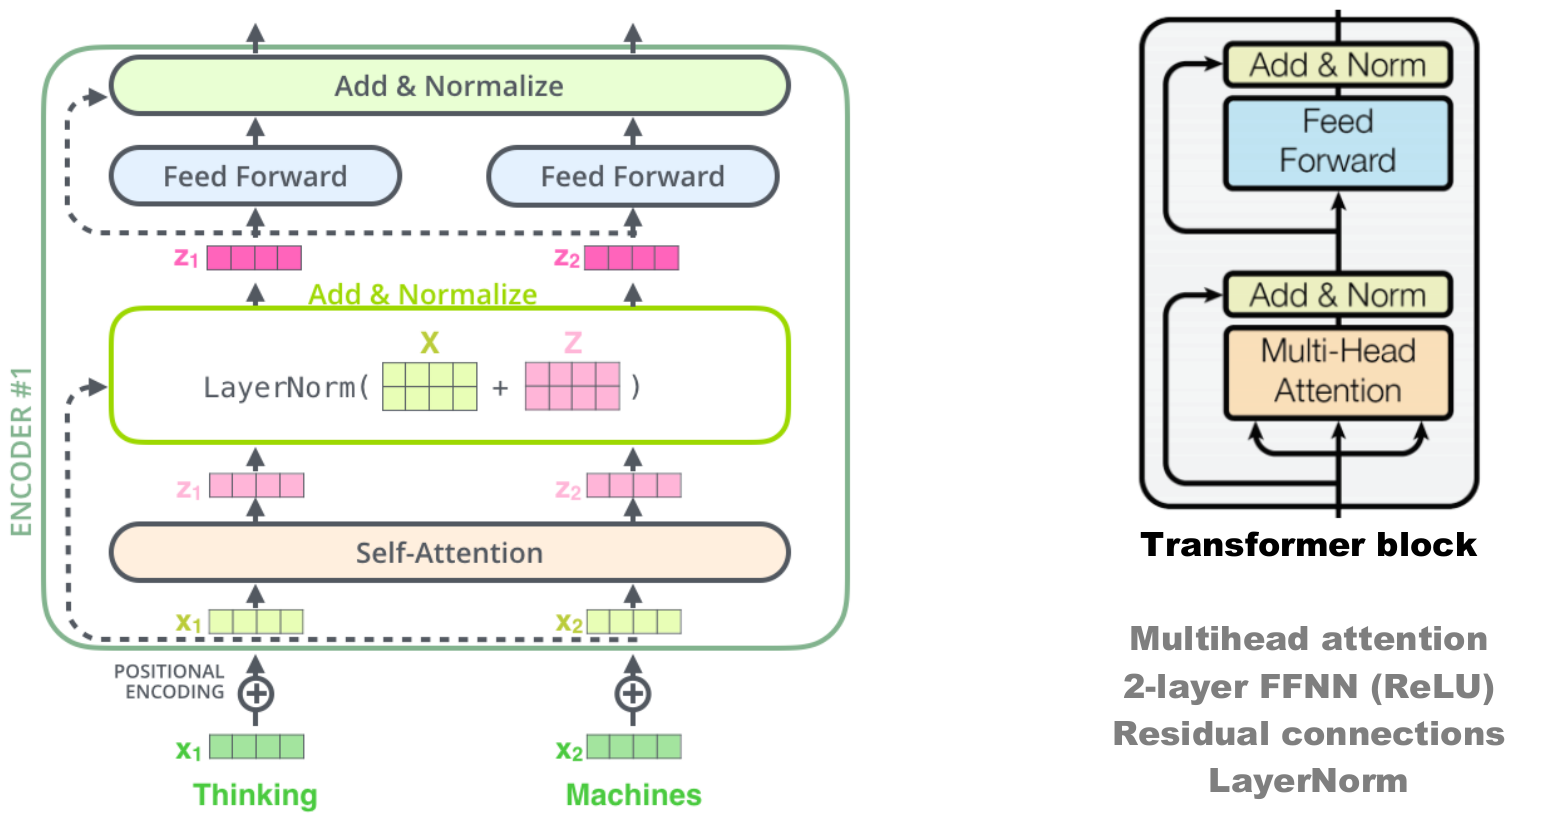

### Residual connection formula

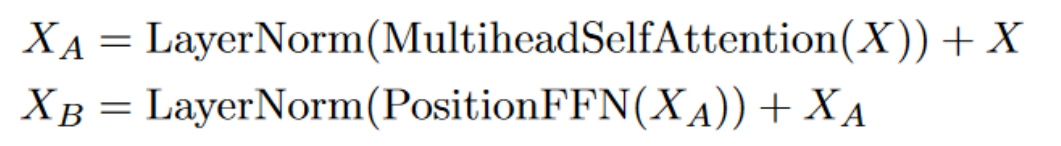

### Layer normalization formula

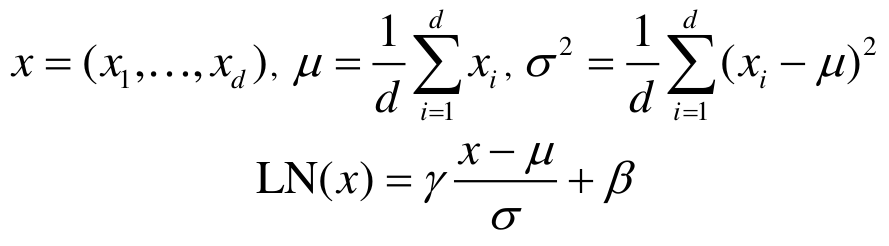

### Feed-Forward layer

Simple 2-layer NN with ReLU activation function

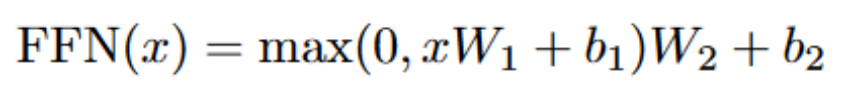

## Decoder

We don't know length of an output sequence, so we get it consequentially, token by token.

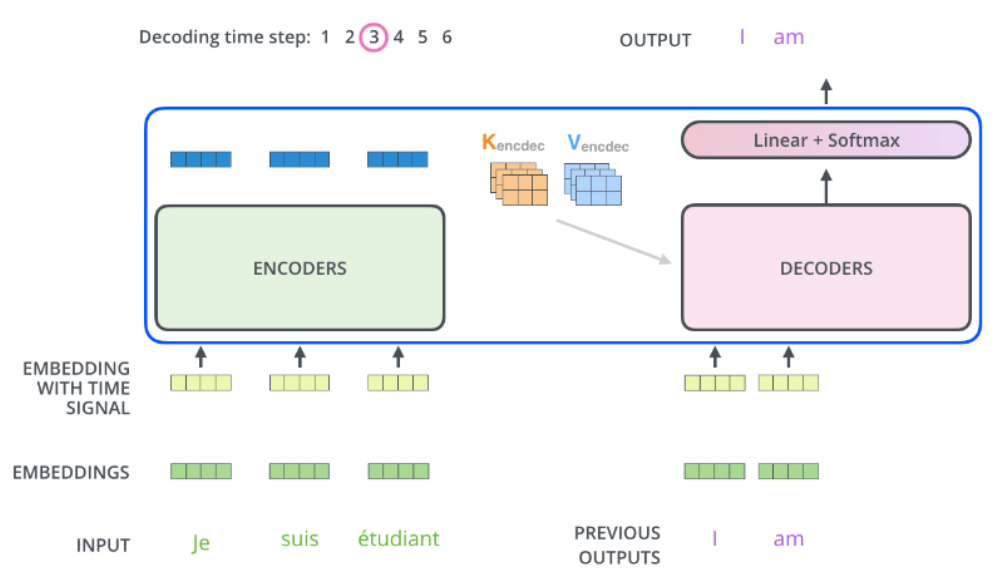

### Masked Self-Attention

#### Padding mask

Mask end tokens of sequences with zero.

#### Sequence mask

Problem: decoder isn't allowed to see future answers during training to avoid data leakage. So we use masked multi-head attention, that masks all encoder tokens that will appear after current token.

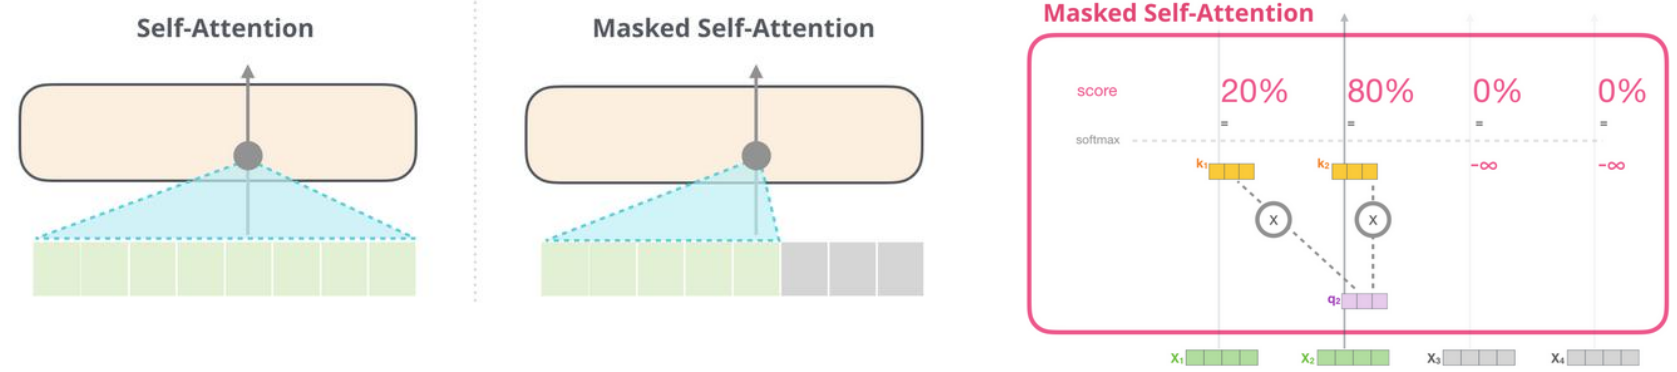

Sequence mask is implemented by adding upper-triangular mask filled with very small values (like -inf or -1e9 to make softmax for these values to be ~ 0) on self-attention weight matrix.

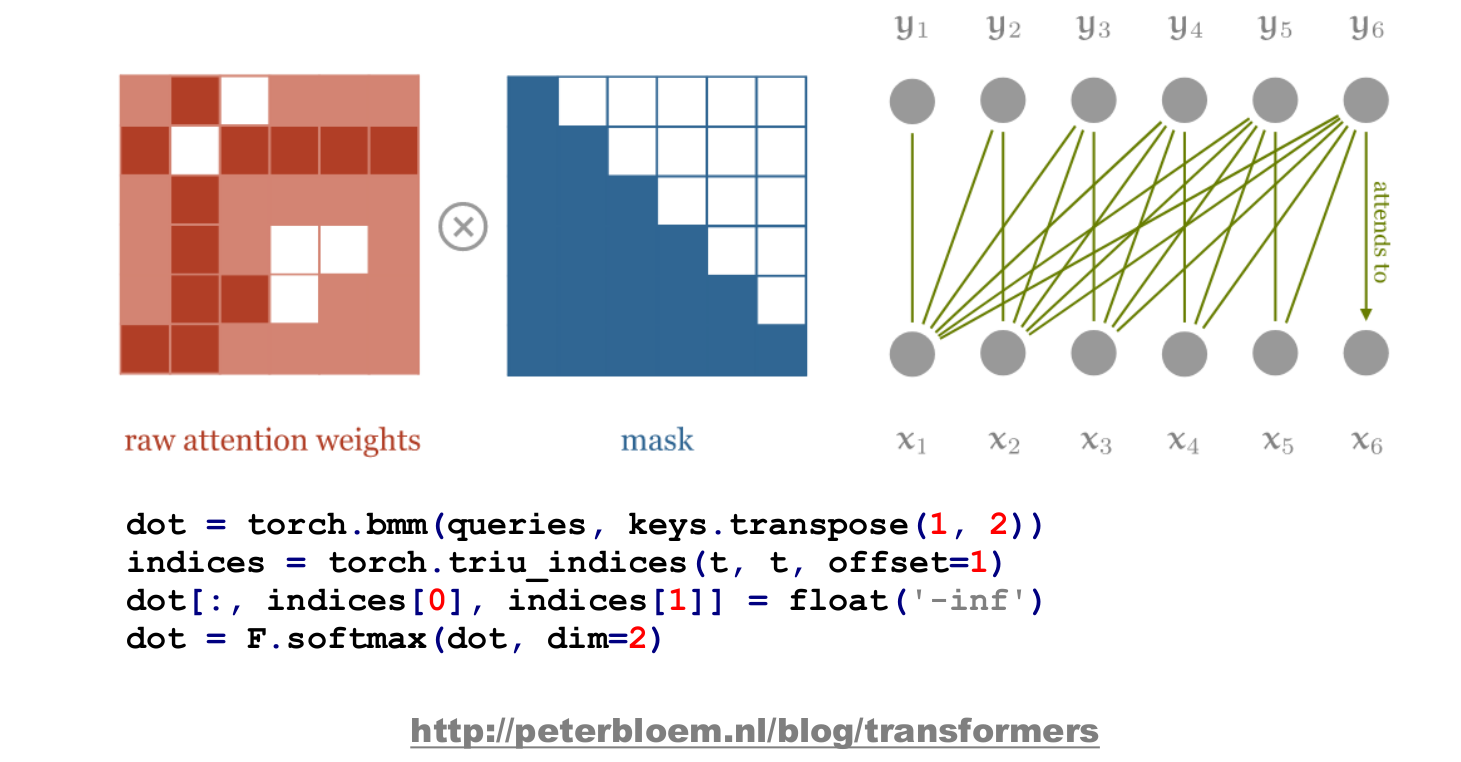

## Output layer

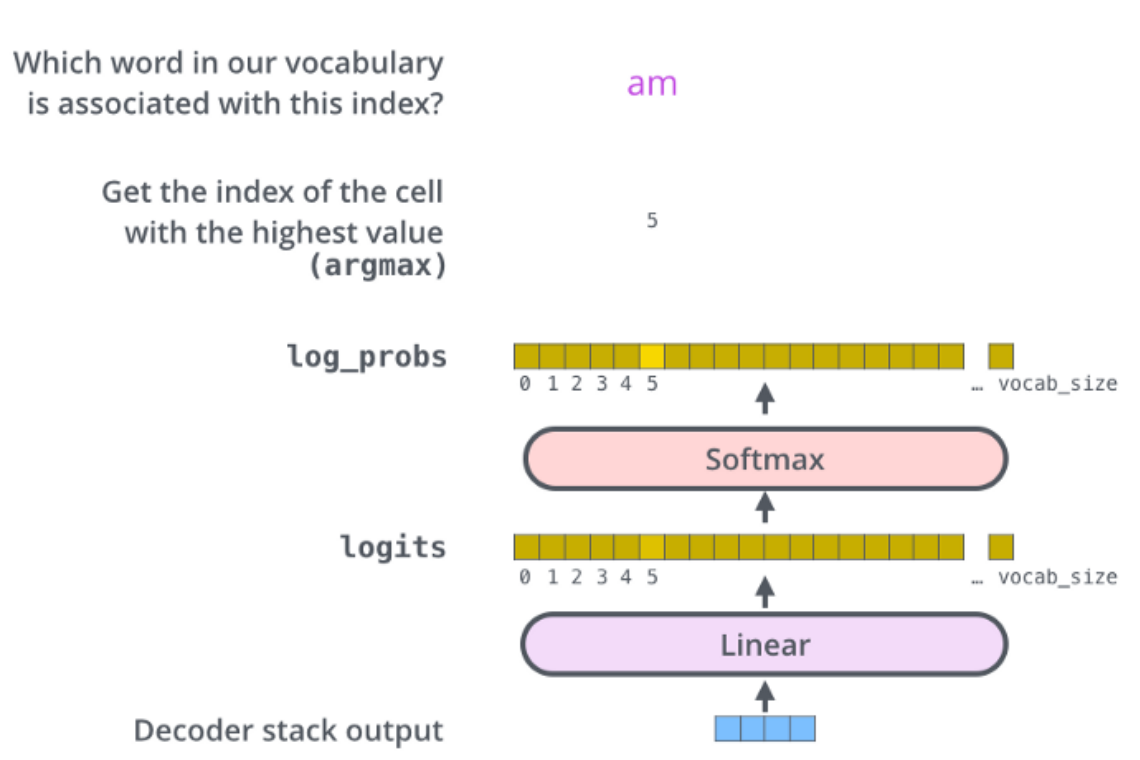

Greedy strategy of output word selection isn't the best.

# Transform training

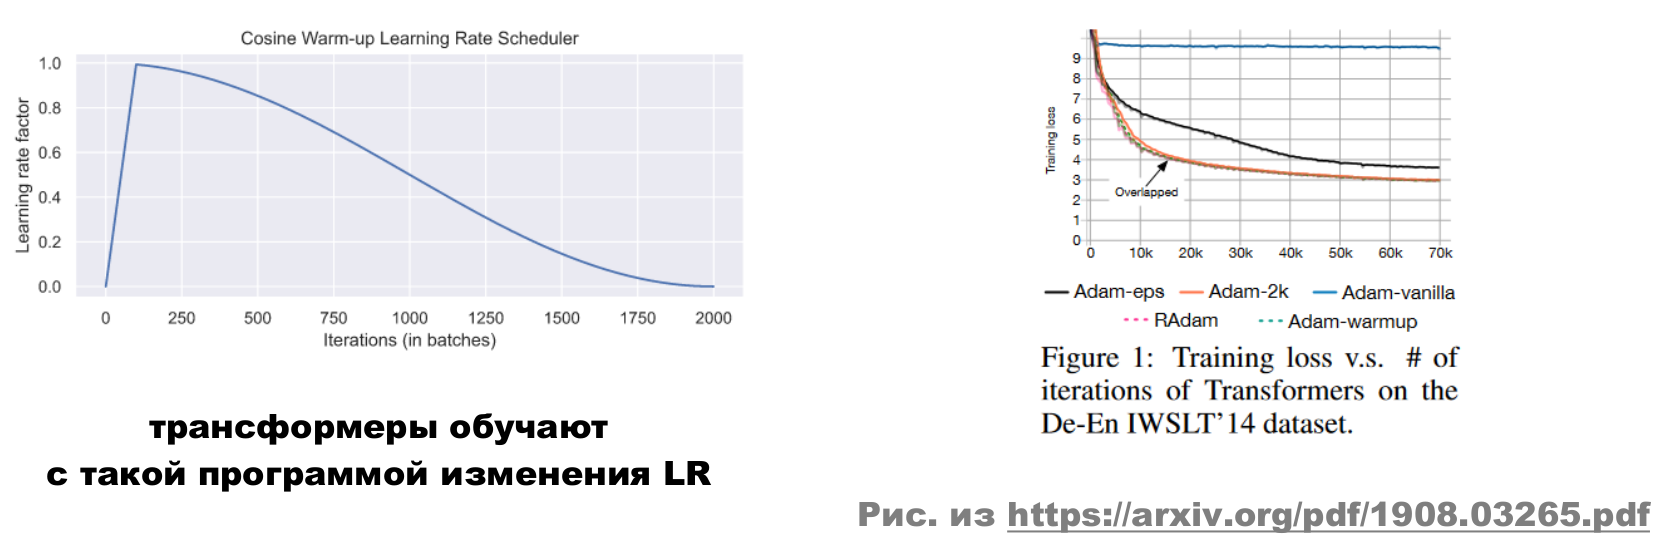

 - use warm up (gradual increasing of LR) on first training epochs, then slowly decrease LR 
 - warn up is used because on first iteration huge LR values can lead to rapid increasing of gradient values caused by Layer Norm module, so training may become unstable
 - after warm up is over - begin to gradually decrease LR on every iteration
 - also warm up is used because Adam optimizer can increase variance on the first iterations, so we need small LR at first

## Learning Rate & Batch Size

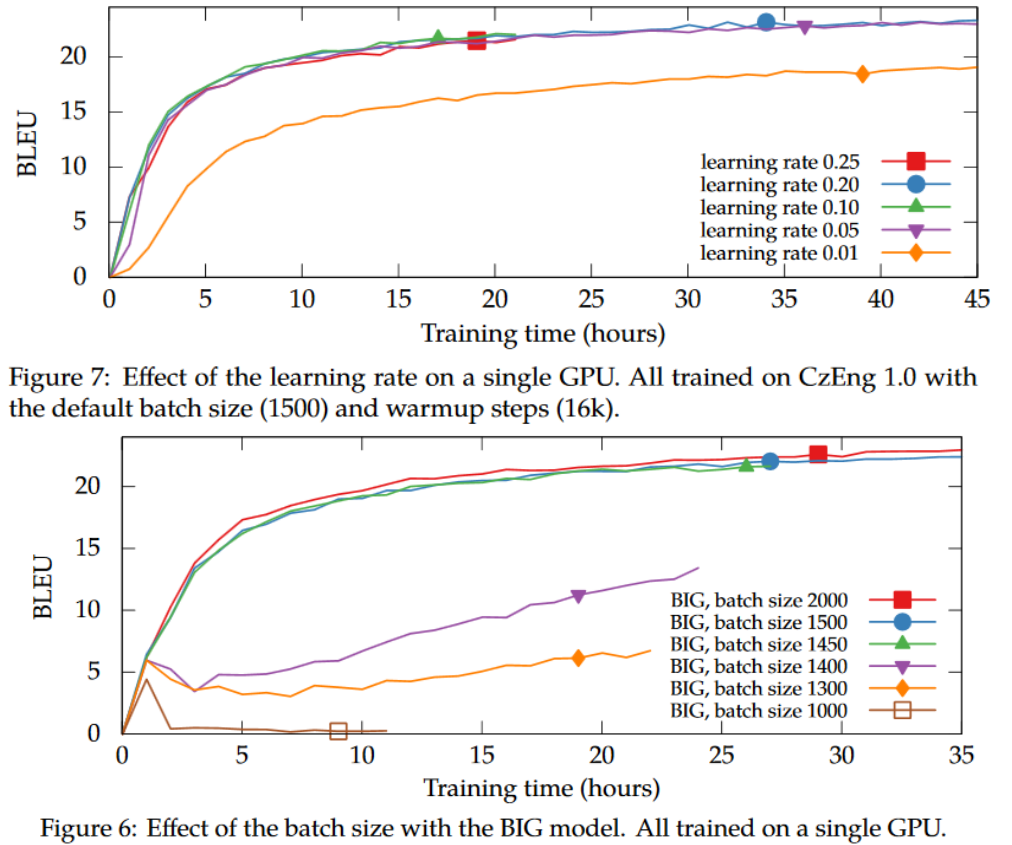

Bigger batch size lets to put longer sequences in it, that leads to increasing of quality.

## Sequence length

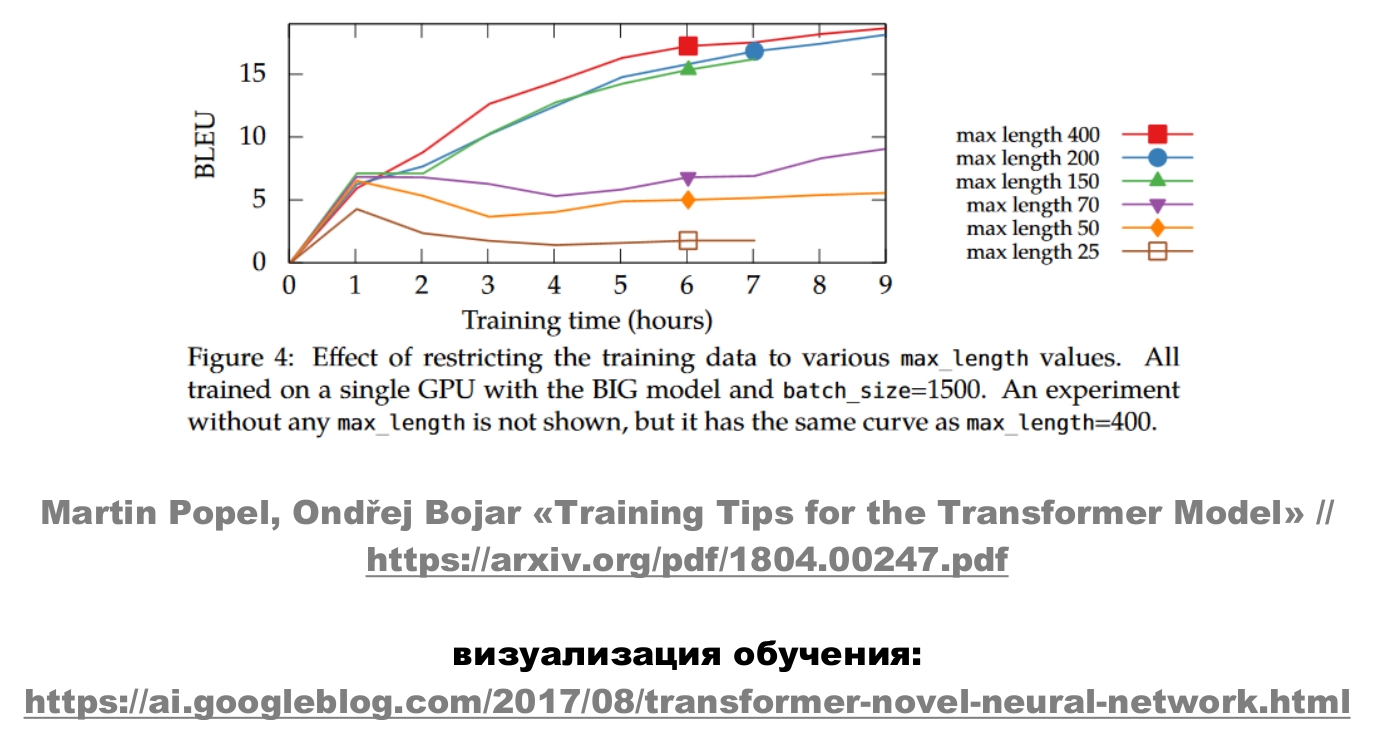

The longer sequence - the better results (see more context)